## **Import Python Modules**

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
# use seaborn plotting style defaults
import seaborn as sns
sns.set_theme(style="darkgrid")
plt.rcParams['figure.figsize'] = (12,8)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

from scipy.stats import beta
from scipy.stats import f

from itertools import cycle

# Machine Learning Modules
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#Bioinformatics data analysis and visualization toolkit
#!pip install bioinfokit

In [ ]:
#from bioinfokit.visuz import cluster

## **Upload File**

In [ ]:
#from google.colab import files
#uploaded = files.upload()

In [ ]:
#read cvs file into dataframe
df = pd.read_csv('/content/abalone age.csv')
df.head(n=25)

Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0    0.455     0.365   0.095        0.5140          0.2245          0.1010   
1    0.350     0.265   0.090        0.2255          0.0995          0.0485   
2    0.530     0.420   0.135        0.6770          0.2565          0.1415   
3    0.440     0.365   0.125        0.5160          0.2155          0.1140   
4    0.330     0.255   0.080        0.2050          0.0895          0.0395   
5    0.425     0.300   0.095        0.3515          0.1410          0.0775   
6    0.530     0.415   0.150        0.7775          0.2370          0.1415   
7    0.545     0.425   0.125        0.7680          0.2940          0.1495   
8    0.475     0.370   0.125        0.5095          0.2165          0.1125   
9    0.550     0.440   0.150        0.8945          0.3145          0.1510   
10   0.525     0.380   0.140        0.6065          0.1940          0.1475   
11   0.430     0.350   0.110        0.4060          0.1675          0.0810   
12   0.490     0.380   0.135        0.5415          0.2175          0.0950   
13   0.535     0.405   0.145        0.6845          0.2725          0.1710   
14   0.470     0.355   0.100        0.4755          0.1675          0.0805   
15   0.500     0.400   0.130        0.6645          0.2580          0.1330   
16   0.355     0.280   0.085        0.2905          0.0950          0.0395   
17   0.440     0.340   0.100        0.4510          0.1880          0.0870   
18   0.365     0.295   0.080        0.2555          0.0970          0.0430   
19   0.450     0.320   0.100        0.3810          0.1705          0.0750   
20   0.355     0.280   0.095        0.2455          0.0955          0.0620   
21   0.380     0.275   0.100        0.2255          0.0800          0.0490   
22   0.565     0.440   0.155        0.9395          0.4275          0.2140   
23   0.550     0.415   0.135        0.7635          0.3180          0.2100   
24   0.615     0.480   0.165        1.1615          0.5130          0.3010   

    Shell weight  Rings  Sex  
0          0.150     15    1  
1          0.070      7    1  
2          0.210      9    0  
3          0.155     10    1  
4          0.055      7    1  
5          0.120      8    1  
6          0.330     20    0  
7          0.260     16    0  
8          0.165      9    1  
9          0.320     19    0  
10         0.210     14    0  
11         0.135     10    1  
12         0.190     11    1  
13         0.205     10    0  
14         0.185     10    0  
15         0.240     12    1  
16         0.115      7    1  
17         0.130     10    0  
18         0.100      7    1  
19         0.115      9    1  
20         0.075     11    1  
21         0.085     10    1  
22         0.270     12    0  
23         0.200      9    0  
24         0.305     10    0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Length          4177 non-null   float64
 1   Diameter        4177 non-null   float64
 2   Height          4177 non-null   float64
 3   Whole weight    4177 non-null   float64
 4   Shucked weight  4177 non-null   float64
 5   Viscera weight  4177 non-null   float64
 6   Shell weight    4177 non-null   float64
 7   Rings           4177 non-null   int64  
 8   Sex             4177 non-null   int64  
dtypes: float64(7), int64(2)
memory usage: 293.8 KB


### **Classes**

In [ ]:
y = df['Sex']
target = df['Sex'].to_numpy()

### **Features**

Data Matrix

In [ ]:
X = df.iloc[:,0:7]
X.head(10)

Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   0.330     0.255   0.080        0.2050          0.0895          0.0395   
5   0.425     0.300   0.095        0.3515          0.1410          0.0775   
6   0.530     0.415   0.150        0.7775          0.2370          0.1415   
7   0.545     0.425   0.125        0.7680          0.2940          0.1495   
8   0.475     0.370   0.125        0.5095          0.2165          0.1125   
9   0.550     0.440   0.150        0.8945          0.3145          0.1510   

   Shell weight  
0         0.150  
1         0.070  
2         0.210  
3         0.155  
4         0.055  
5         0.120  
6         0.330  
7         0.260  
8         0.165  
9         0.320

In [ ]:
X.describe().transpose()

count      mean       std     min     25%     50%    75%  \
Length          4177.0  0.523992  0.120093  0.0750  0.4500  0.5450  0.615   
Diameter        4177.0  0.407881  0.099240  0.0550  0.3500  0.4250  0.480   
Height          4177.0  0.139516  0.041827  0.0000  0.1150  0.1400  0.165   
Whole weight    4177.0  0.828742  0.490389  0.0020  0.4415  0.7995  1.153   
Shucked weight  4177.0  0.359367  0.221963  0.0010  0.1860  0.3360  0.502   
Viscera weight  4177.0  0.180594  0.109614  0.0005  0.0935  0.1710  0.253   
Shell weight    4177.0  0.238831  0.139203  0.0015  0.1300  0.2340  0.329   

                   max  
Length          0.8150  
Diameter        0.6500  
Height          1.1300  
Whole weight    2.8255  
Shucked weight  1.4880  
Viscera weight  0.7600  
Shell weight    1.0050

Notice that the data is not standardizd. So we need to standarize it.

In [ ]:
X_st = StandardScaler().fit_transform(X)
df = pd.DataFrame(X_st)
df.columns = X.columns

In [ ]:
df.describe().transpose()

count          mean      std       min       25%       50%  \
Length          4177.0 -5.834718e-16  1.00012 -3.739154 -0.616198  0.174951   
Diameter        4177.0 -3.027929e-16  1.00012 -3.556267 -0.583316  0.172519   
Height          4177.0  3.912493e-16  1.00012 -3.335953 -0.586208  0.011563   
Whole weight    4177.0  9.185853e-17  1.00012 -1.686092 -0.789758 -0.059638   
Shucked weight  4177.0 -1.020650e-17  1.00012 -1.614731 -0.781159 -0.105289   
Viscera weight  4177.0  2.704723e-16  1.00012 -1.643173 -0.794642 -0.087532   
Shell weight    4177.0  2.976897e-16  1.00012 -1.705134 -0.781909 -0.034708   

                     75%        max  
Length          0.757903   2.423480  
Diameter        0.726798   2.440025  
Height          0.609334  23.683287  
Whole weight    0.661305   4.072271  
Shucked weight  0.642673   5.085388  
Viscera weight  0.660635   5.286500  
Shell weight    0.647832   5.504642

Notice that the data is now standardizd.

**Observations and variables**

In [ ]:
observations = list(df.index)
print(observations)
variables = list(df.columns)
print(variables)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

## **Data Visualisation**

### Class Distribution

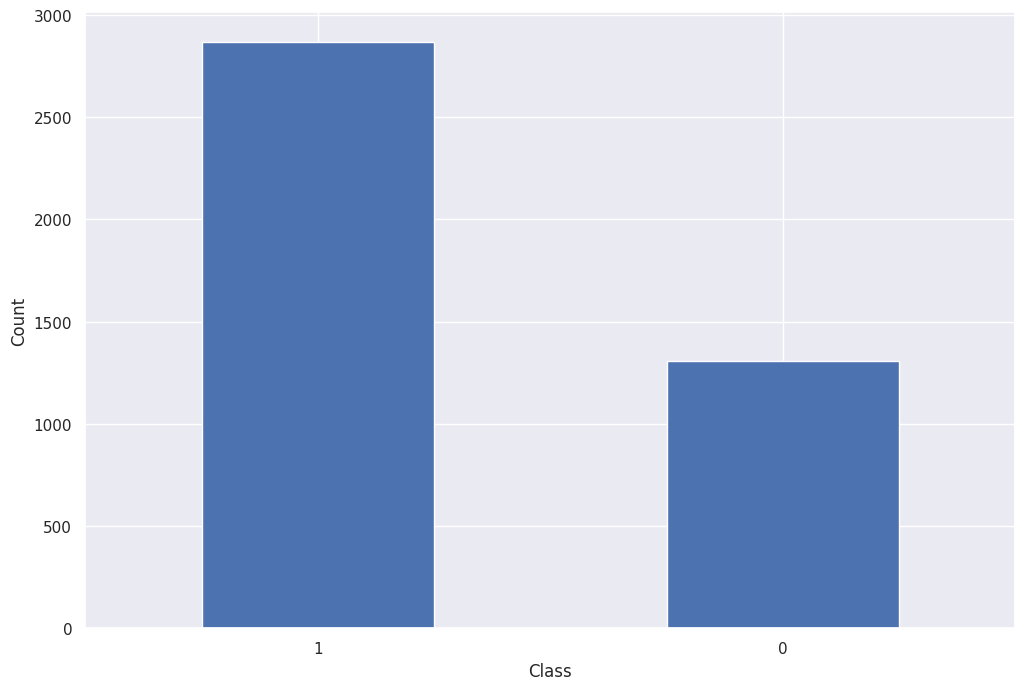

In [ ]:
y.value_counts().plot(kind='bar', rot=0)
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

### Box & Whisker Plots

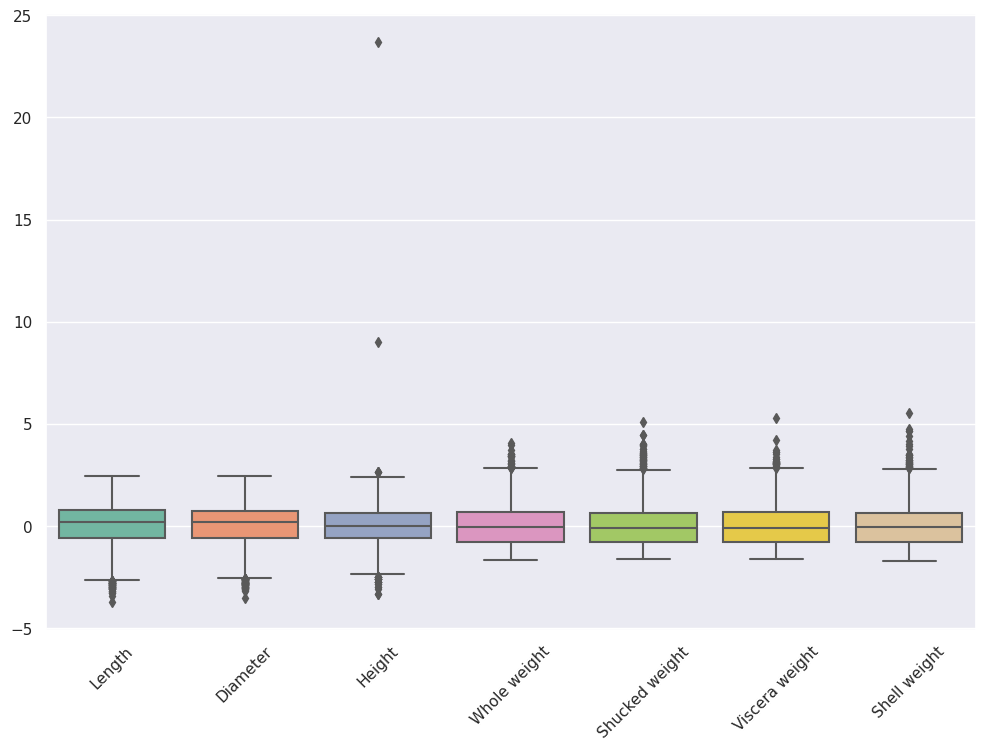

In [ ]:
ax = plt.figure()
ax = sns.boxplot(data=df, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:.25'` for same effect.
  warnings.warn(msg, FutureWarning)


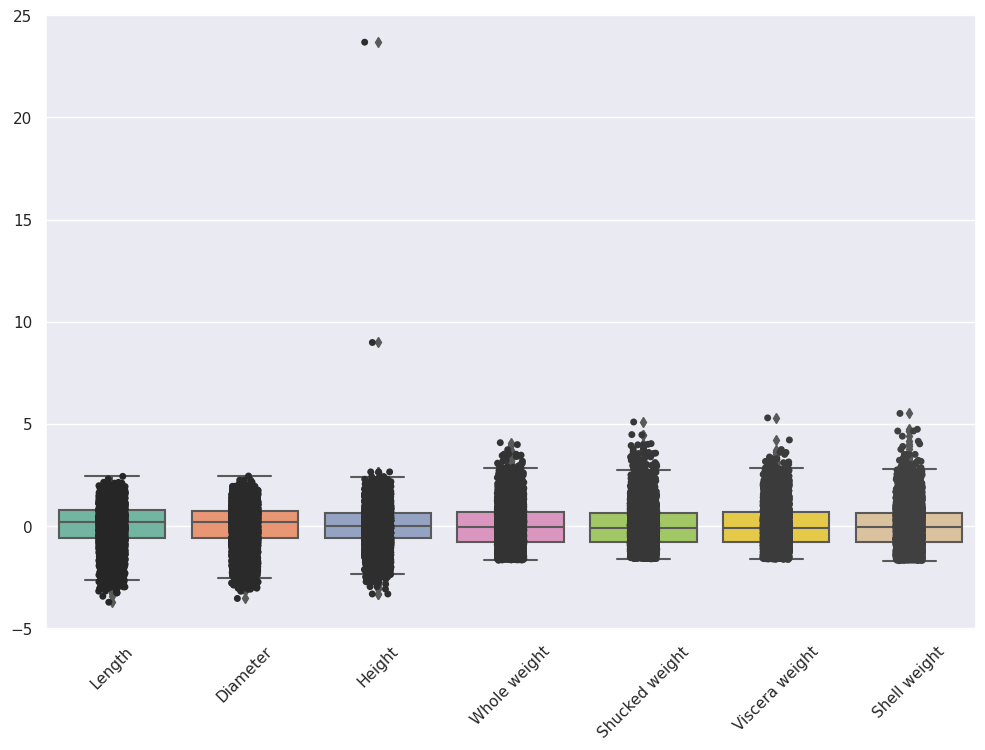

In [ ]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()
ax = plt.figure()
ax = sns.boxplot(data=df, orient="v", palette="Set2")
ax = sns.stripplot(data=df, color=".25")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

### Five Number Summary

In [ ]:
df.describe()

Length      Diameter        Height  Whole weight  Shucked weight  \
count  4.177000e+03  4.177000e+03  4.177000e+03  4.177000e+03    4.177000e+03   
mean  -5.834718e-16 -3.027929e-16  3.912493e-16  9.185853e-17   -1.020650e-17   
std    1.000120e+00  1.000120e+00  1.000120e+00  1.000120e+00    1.000120e+00   
min   -3.739154e+00 -3.556267e+00 -3.335953e+00 -1.686092e+00   -1.614731e+00   
25%   -6.161975e-01 -5.833158e-01 -5.862075e-01 -7.897577e-01   -7.811585e-01   
50%    1.749513e-01  1.725193e-01  1.156329e-02 -5.963767e-02   -1.052891e-01   
75%    7.579031e-01  7.267984e-01  6.093341e-01  6.613049e-01    6.426730e-01   
max    2.423480e+00  2.440025e+00  2.368329e+01  4.072271e+00    5.085388e+00   

       Viscera weight  Shell weight  
count    4.177000e+03  4.177000e+03  
mean     2.704723e-16  2.976897e-16  
std      1.000120e+00  1.000120e+00  
min     -1.643173e+00 -1.705134e+00  
25%     -7.946415e-01 -7.819095e-01  
50%     -8.753202e-02 -3.470794e-02  
75%      6.606355e-01  6.478319e-01  
max      5.286500e+00  5.504642e+00

### Pair Plot

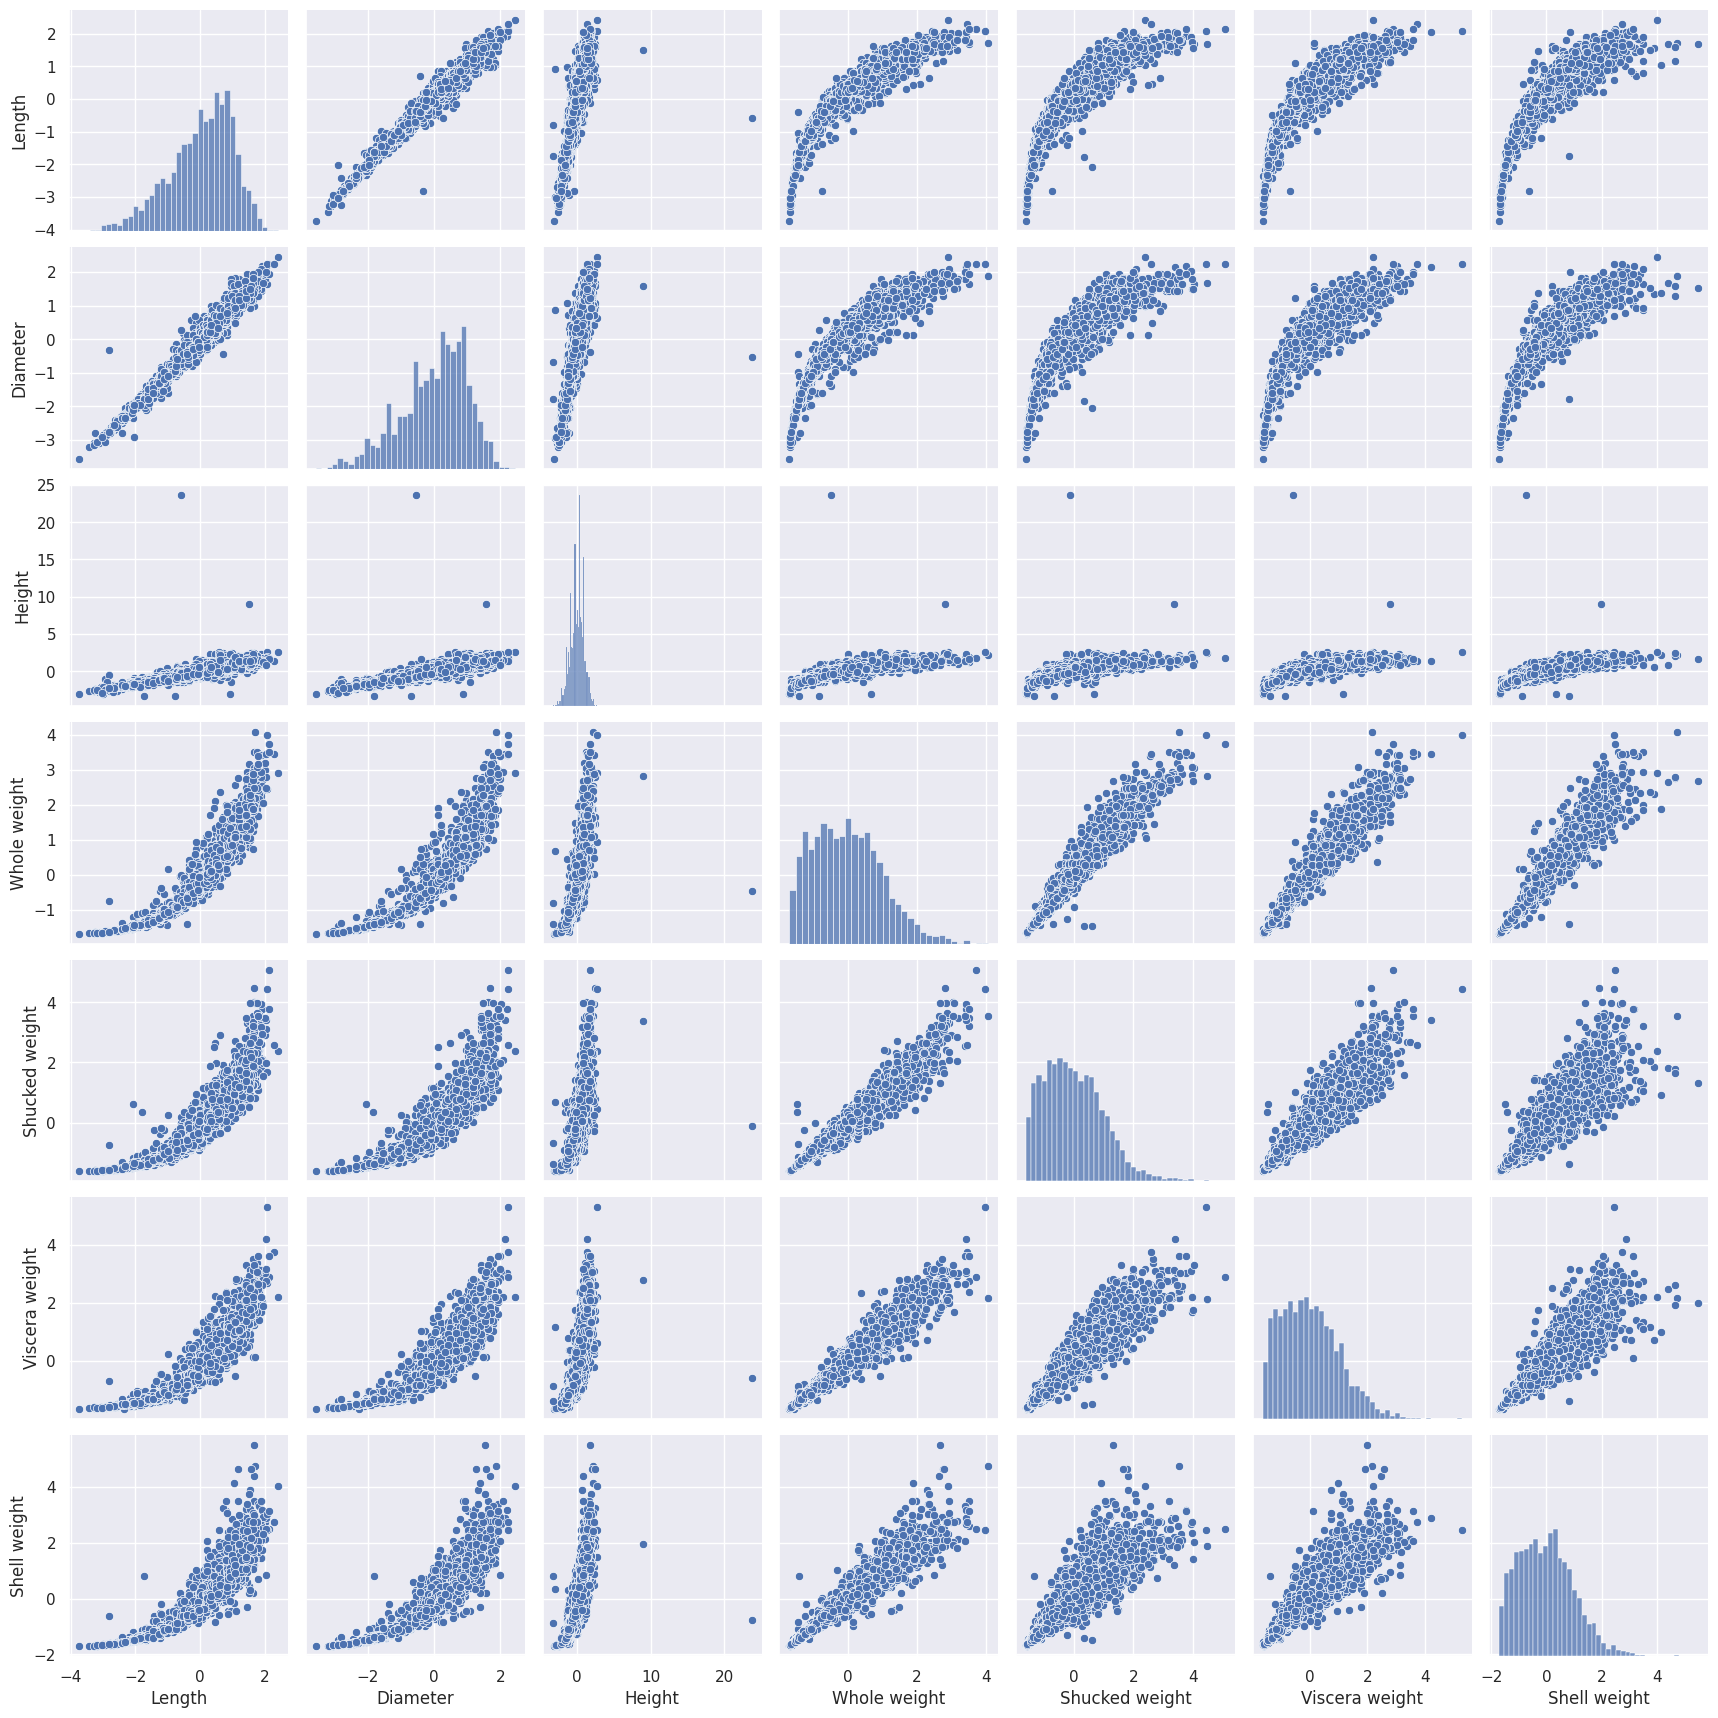

In [ ]:
sns.pairplot(df)

## **Covariance**

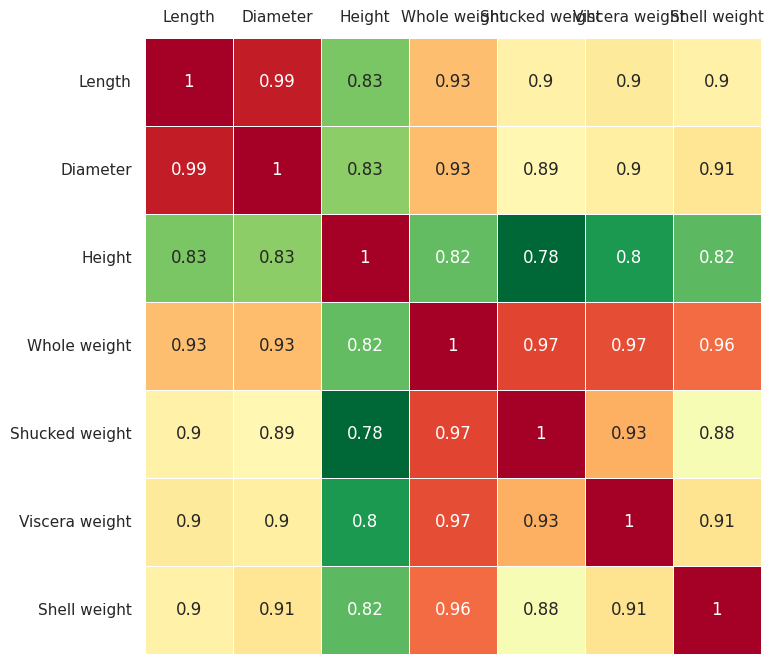

In [ ]:
dfc = df - df.mean() #centered data
ax = sns.heatmap(dfc.cov(), cmap='RdYlGn_r', linewidths=0.5, annot=True,
            cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);
#plt.title('Covariance matrix')

## **Principal Component Analysis (PCA)**

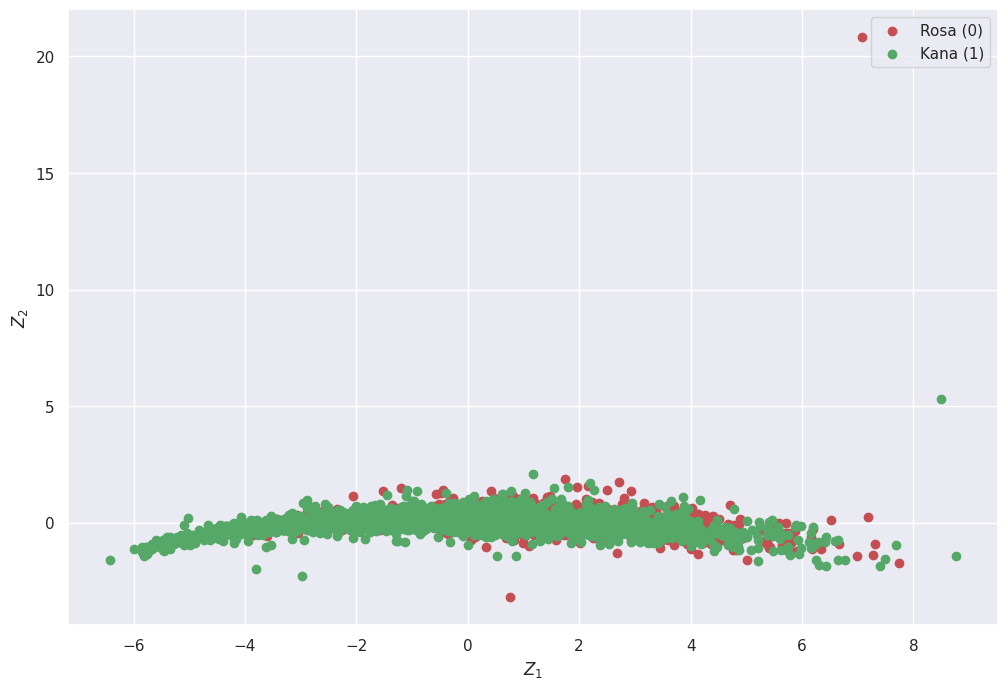

In [ ]:
pca = PCA()
pca.fit(df)
Z = pca.fit_transform(df)

# 1(Rosa)->0,  2(Kama)->1, 3(Canadian)->2
idx_Rosa = np.where(target == 0)
idx_Kana = np.where(target == 1)


plt. figure()
plt.scatter(Z[idx_Rosa,0], Z[idx_Rosa,1], c='r', label='Rosa (0)')
plt.scatter(Z[idx_Kana,0], Z[idx_Kana,1], c='g', label='Kana (1)')
plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
plt.show()
#for label, x, y in zip(observations,Z[:, 0],Z[:, 1]):
#    plt.annotate(label, xy=(x, y), xytext=(-2, 2),
#        textcoords='offset points', ha='right', va='bottom')

### **Eigenvectors**

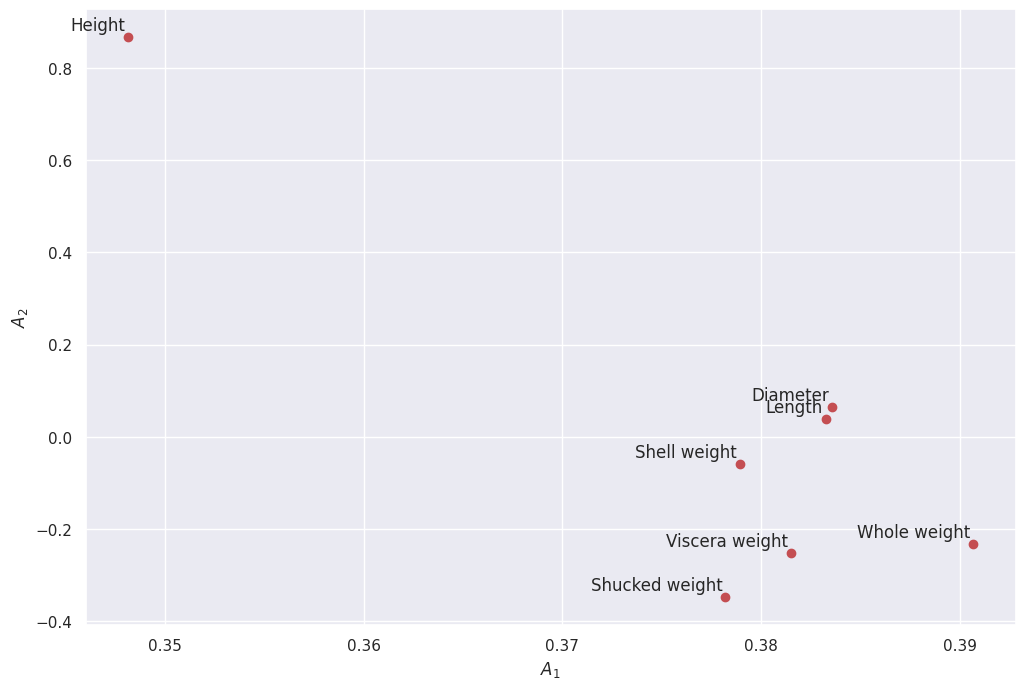

In [ ]:
A = pca.components_.T
#print(f'Eigenvector matrix:\n{A}')

plt.figure()
plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')

/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


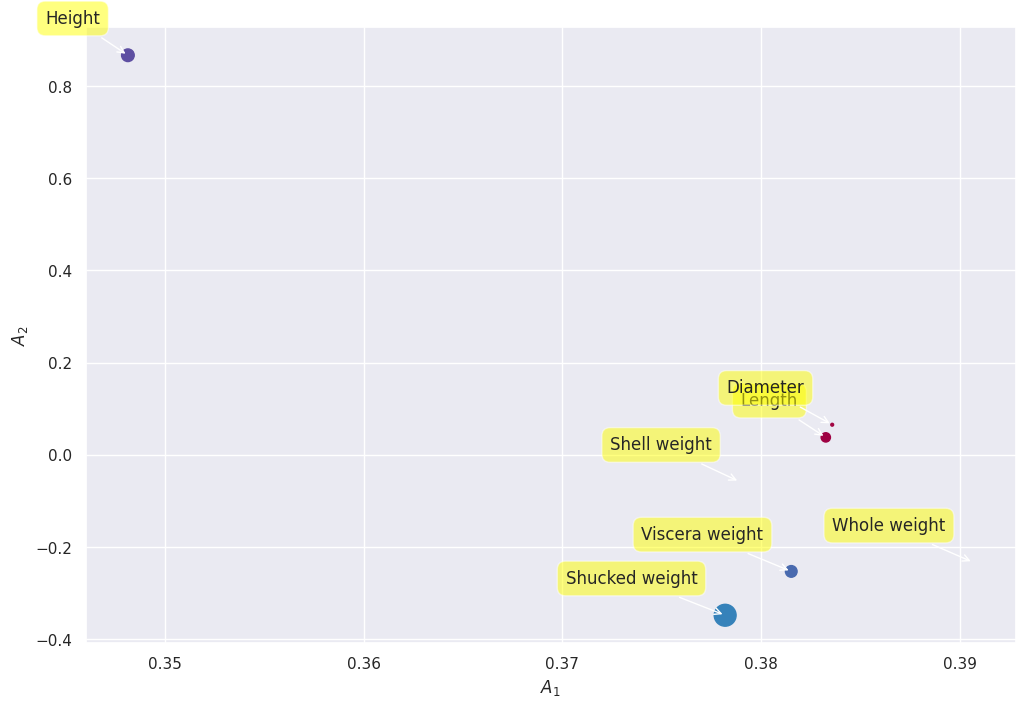

In [ ]:
plt.figure()
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

### **Scree plot**

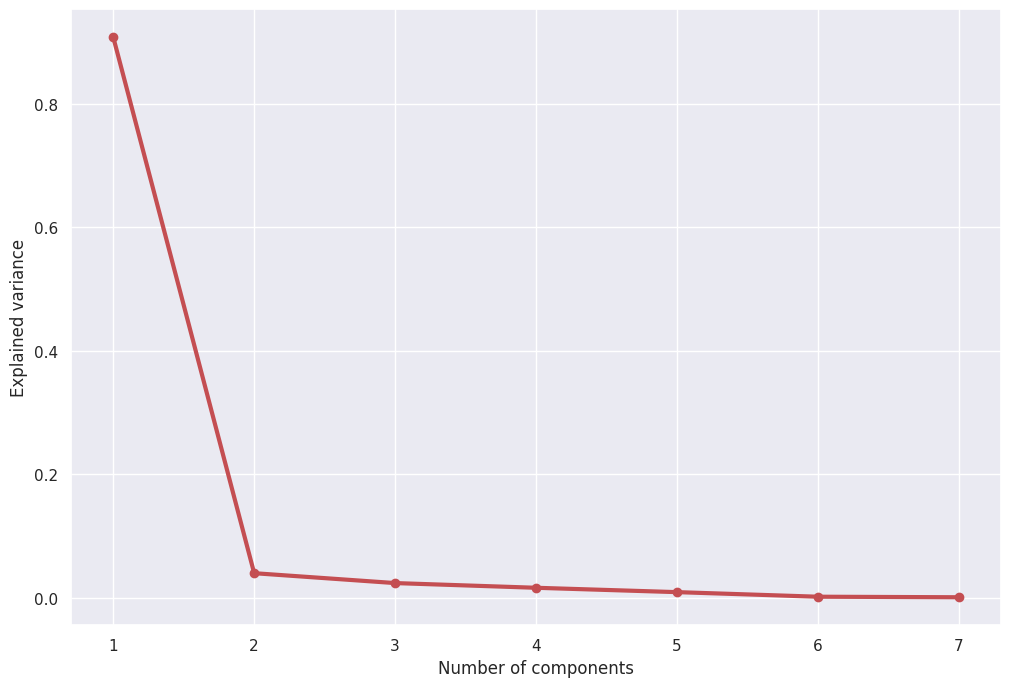

In [ ]:
#Eigenvalues
Lambda = pca.explained_variance_
#print(f'Eigenvalues:\n{Lambda}')

#Scree plot
plt. figure()
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.show()


### **Explained Variance**

Text(0, 0.5, 'Cumulative explained variance')

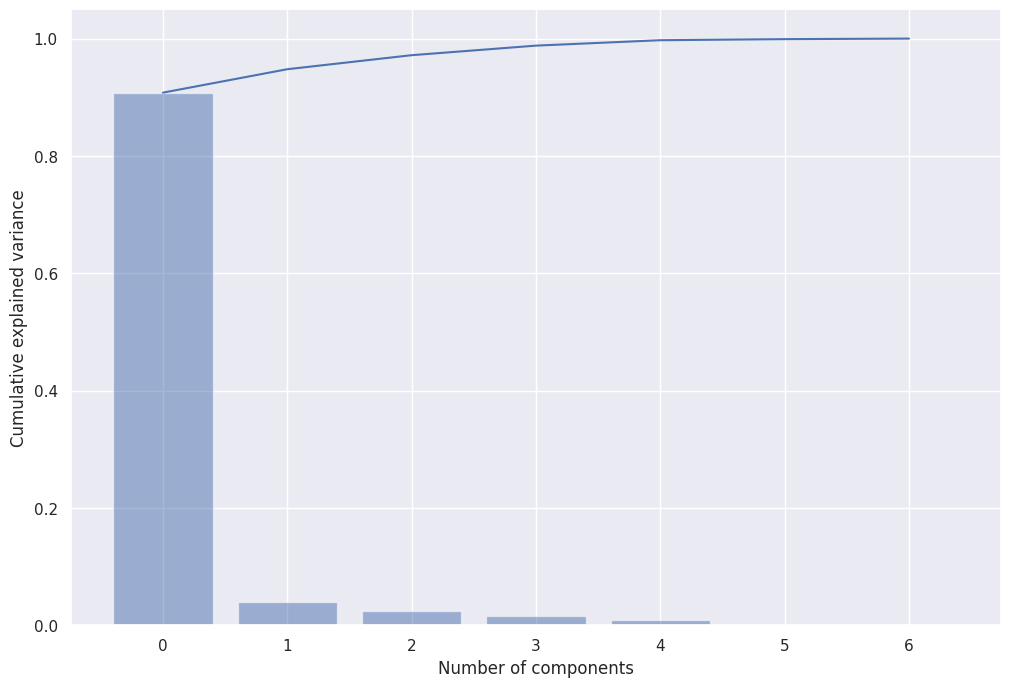

In [ ]:
ell = pca.explained_variance_ratio_
plt.figure()
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

**Explained Variance per PC**

In [ ]:
PC_variance = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}
PC_variance

{'0': 'PC 1 (90.8%)',
 '1': 'PC 2 (4.0%)',
 '2': 'PC 3 (2.4%)',
 '3': 'PC 4 (1.6%)',
 '4': 'PC 5 (0.9%)',
 '5': 'PC 6 (0.2%)',
 '6': 'PC 7 (0.1%)'}

### **Biplot**

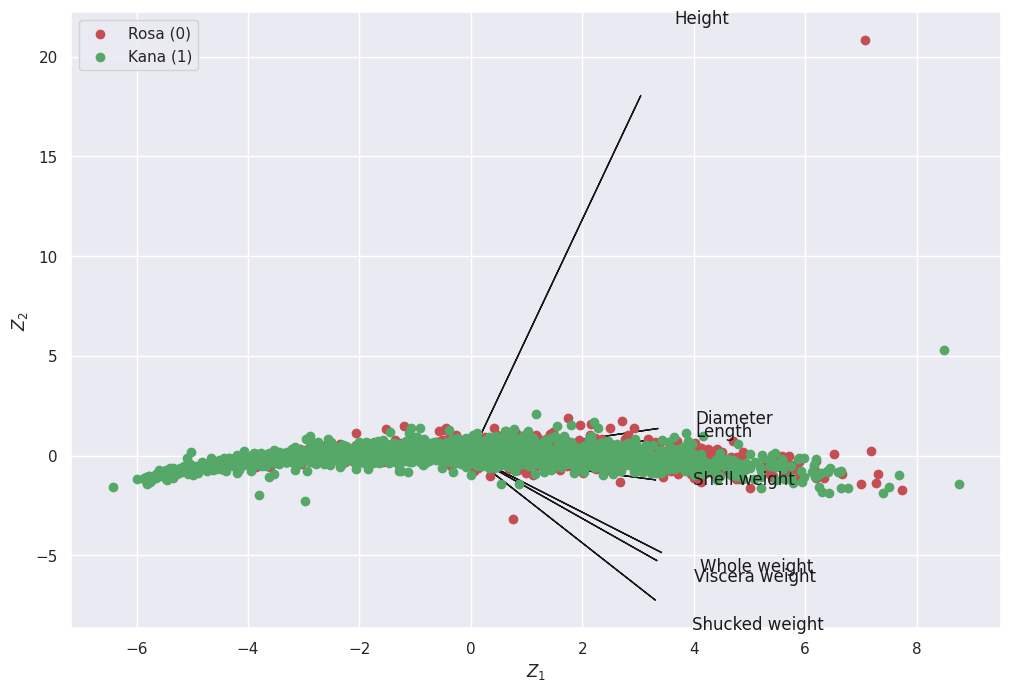

In [ ]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0]
A2 = A[:,1]
Z1 = Z[:,0]
Z2 = Z[:,1]

plt.figure()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_Rosa,0], Z[idx_Rosa,1], c='r', label='Rosa (0)')
plt.scatter(Z[idx_Kana,0], Z[idx_Kana,1], c='g', label='Kana (1)')
#plt.scatter(Z[idx_Canadian,0], Z[idx_Canadian,1], c='b', label='Canadian (2)')
plt.legend(loc='upper left')
#for i in range(len(Z1)):
# circles project documents (ie rows from csv) as points onto PC axes
  #plt.scatter(Z1[i], Z2[i], c='g', marker='o')
  #plt.text(Z1[i]*1.2, Z2[i]*1.2, observations[i], color='b')

In [ ]:
#cluster.biplot(cscore=Z, loadings=A, labels=X.columns.values, var1=round(pca.explained_variance_ratio_[0]*100, 2),
#               var2=round(pca.explained_variance_ratio_[1]*100, 2), colorlist=target)

**Using PCA Librarry**

In [ ]:
!pip install pca

In [ ]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(df)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [7] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [3] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [7] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


In [ ]:
 # Print the top features. The results show that f1 is best, followed by f2 etc
print(out['topfeat'])

    PC         feature   loading  type
0  PC1    Whole weight  0.390673  best
1  PC2          Height  0.866836  best
2  PC3          Length -0.593280  best
3  PC3        Diameter -0.585366  weak
4  PC1  Shucked weight  0.378188  weak
5  PC1  Viscera weight  0.381513  weak
6  PC1    Shell weight  0.378922  weak


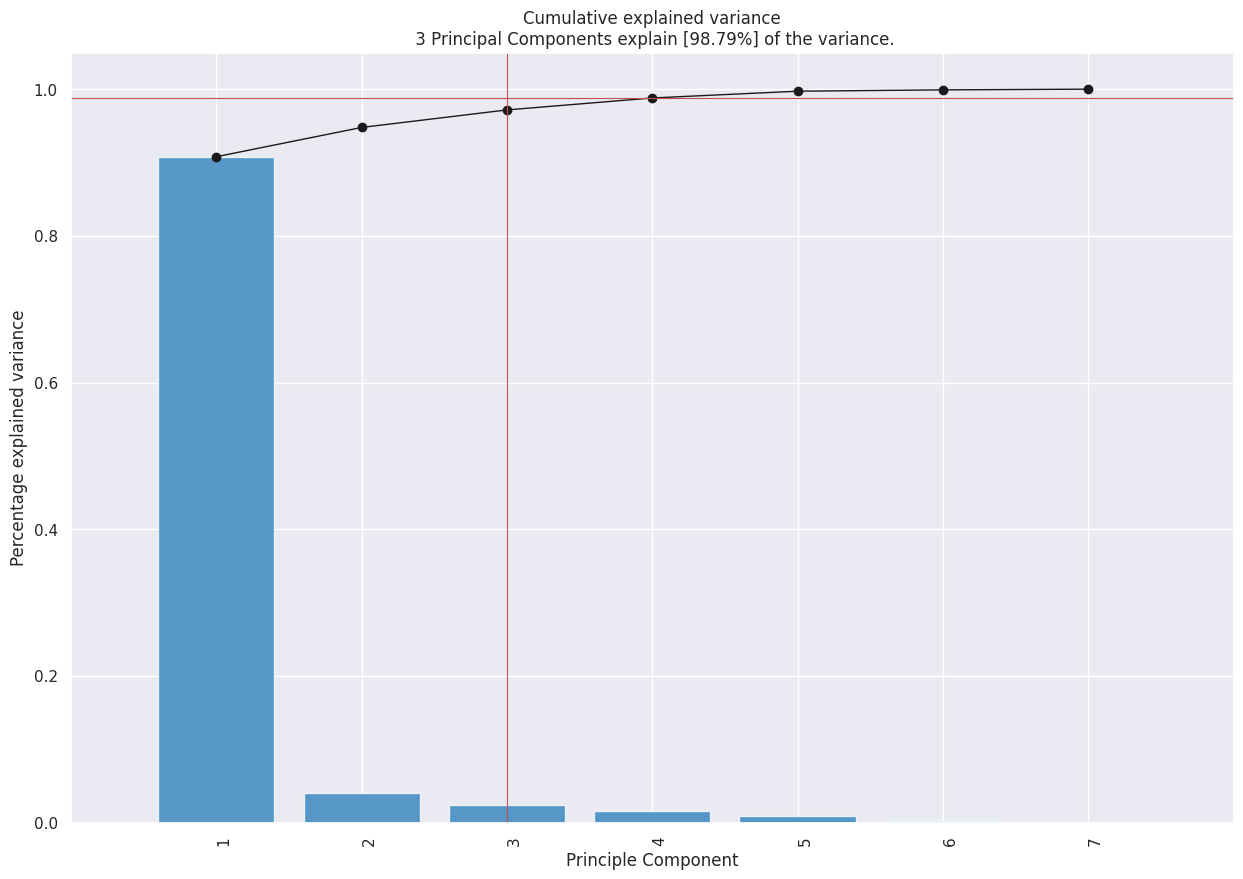

In [ ]:
model.plot();

[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.


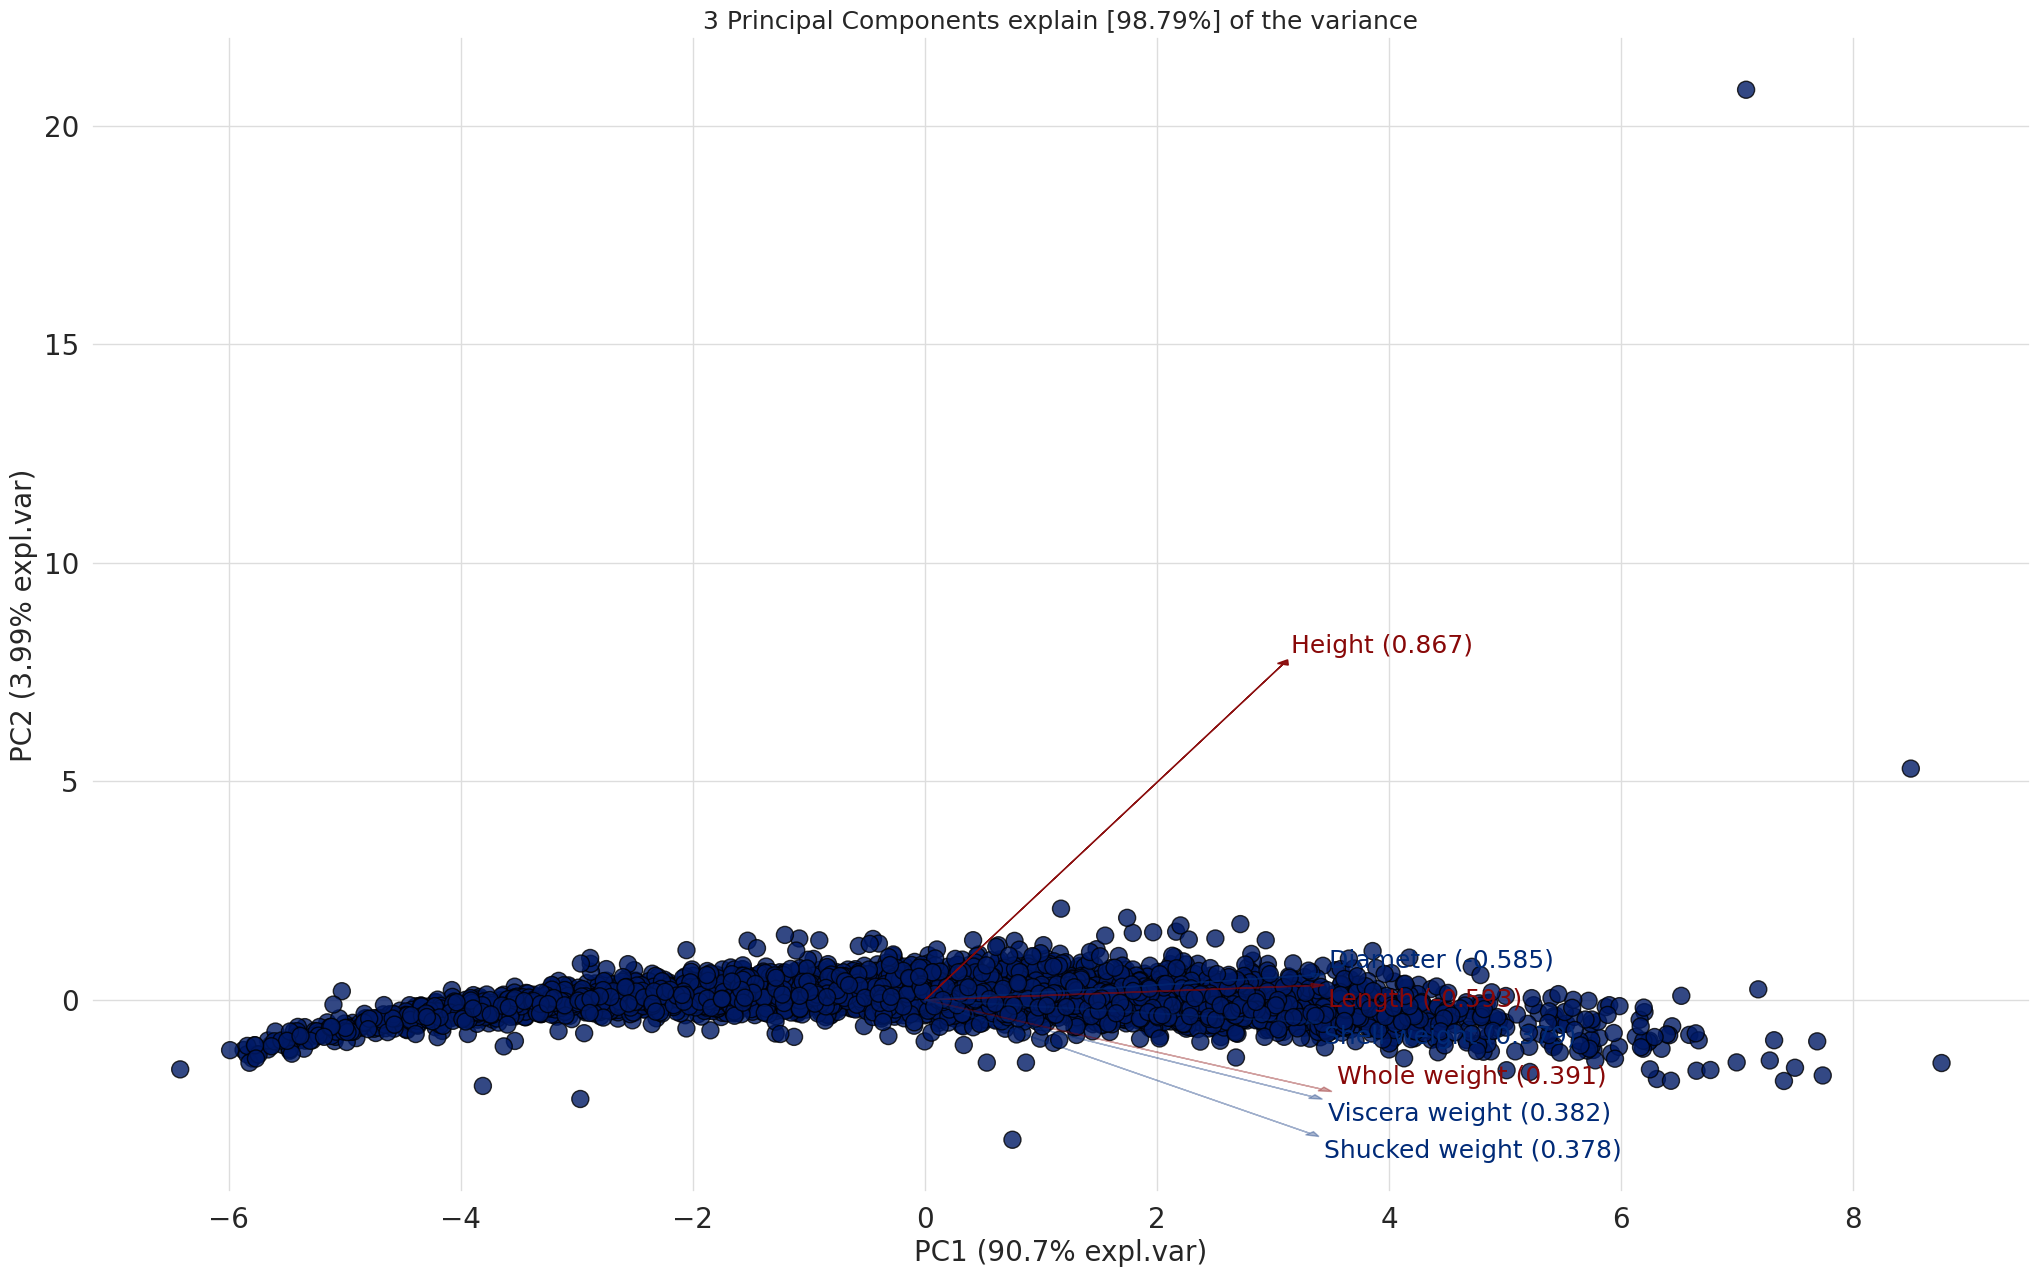

In [ ]:
 ax = model.biplot(label=False, legend=False)

[scatterd] >INFO> Create scatterplot


[pca] >Plot PC1 vs PC2 with loadings.


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '3 Principal Components explain [98.79%] of the variance'}, xlabel='PC1 (90.7% expl.var)', ylabel='PC2 (3.99% expl.var)'>)

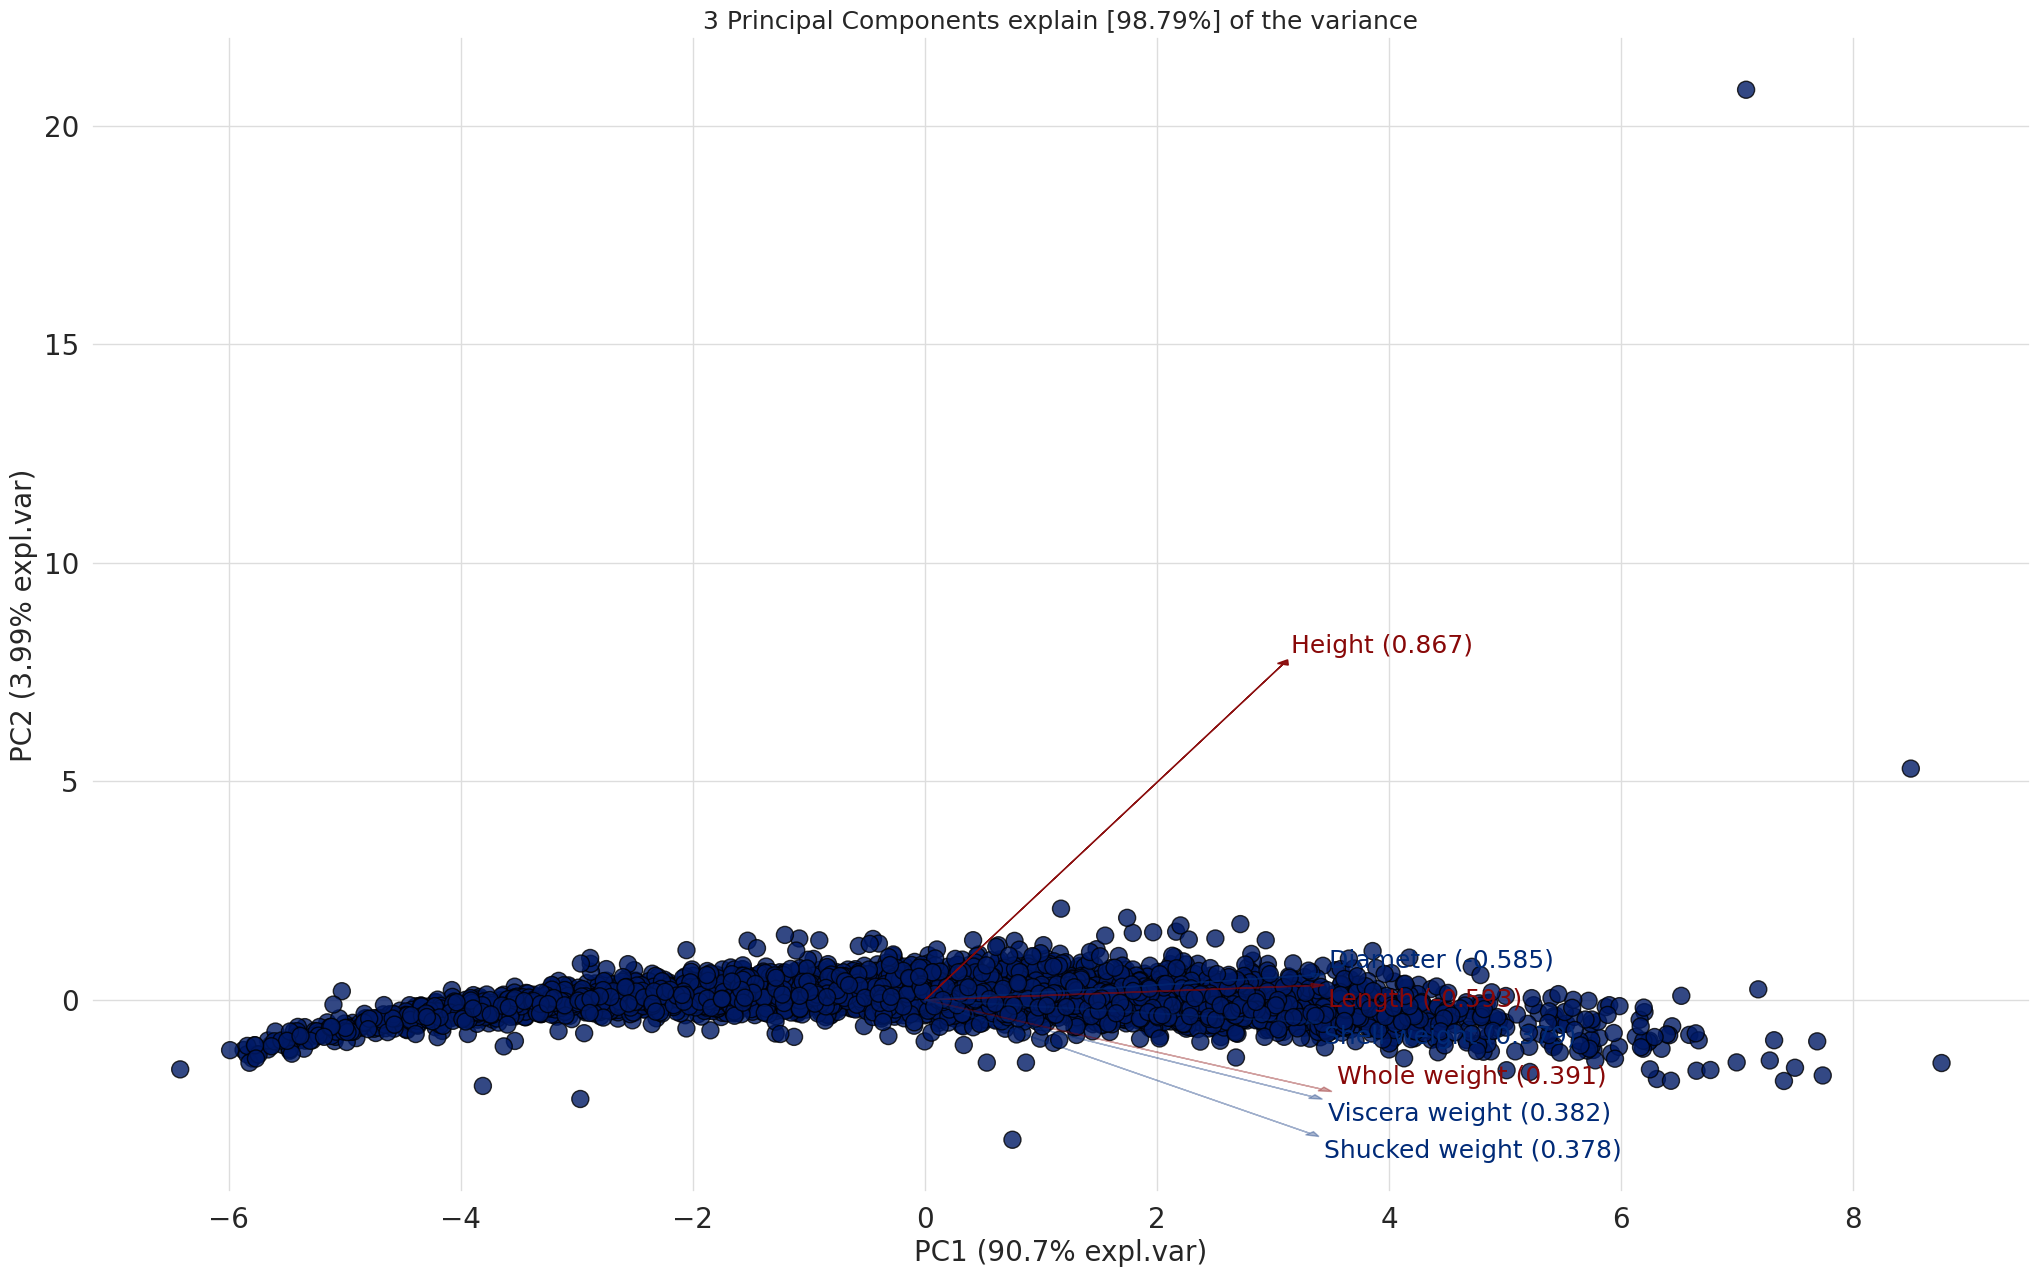

In [ ]:
model.biplot(legend=False)

[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '3 Principal Components explain [98.79%] of the variance'}, xlabel='PC1 (90.7% expl.var)', ylabel='PC2 (3.99% expl.var)'>)

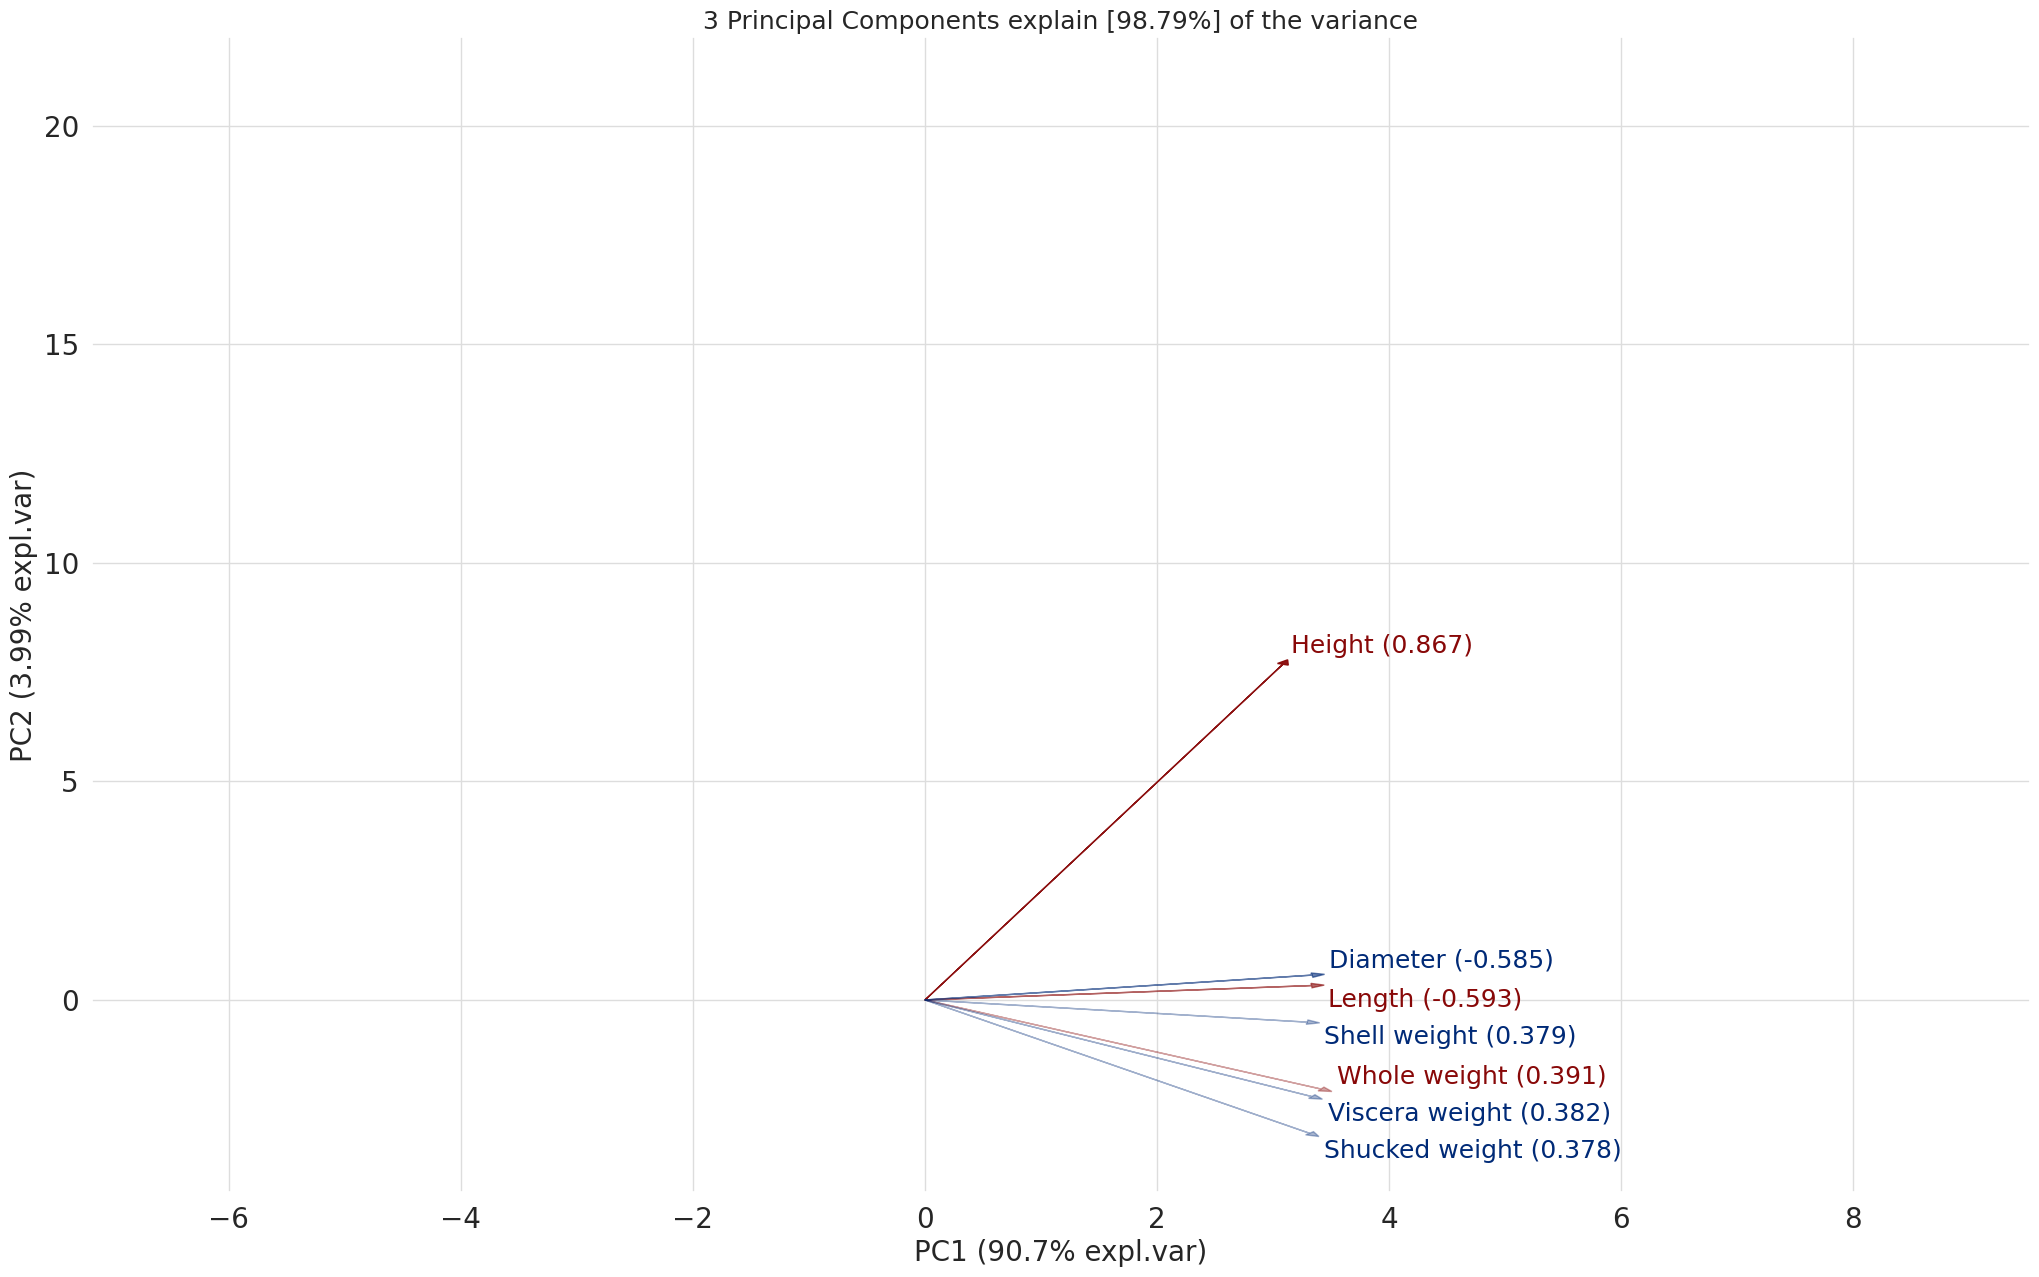

In [ ]:
model.biplot(cmap=None, label=False, legend=False)

[scatterd] >INFO> Create scatterplot


[pca] >Plot PC1 vs PC2 vs PC3 with loadings.


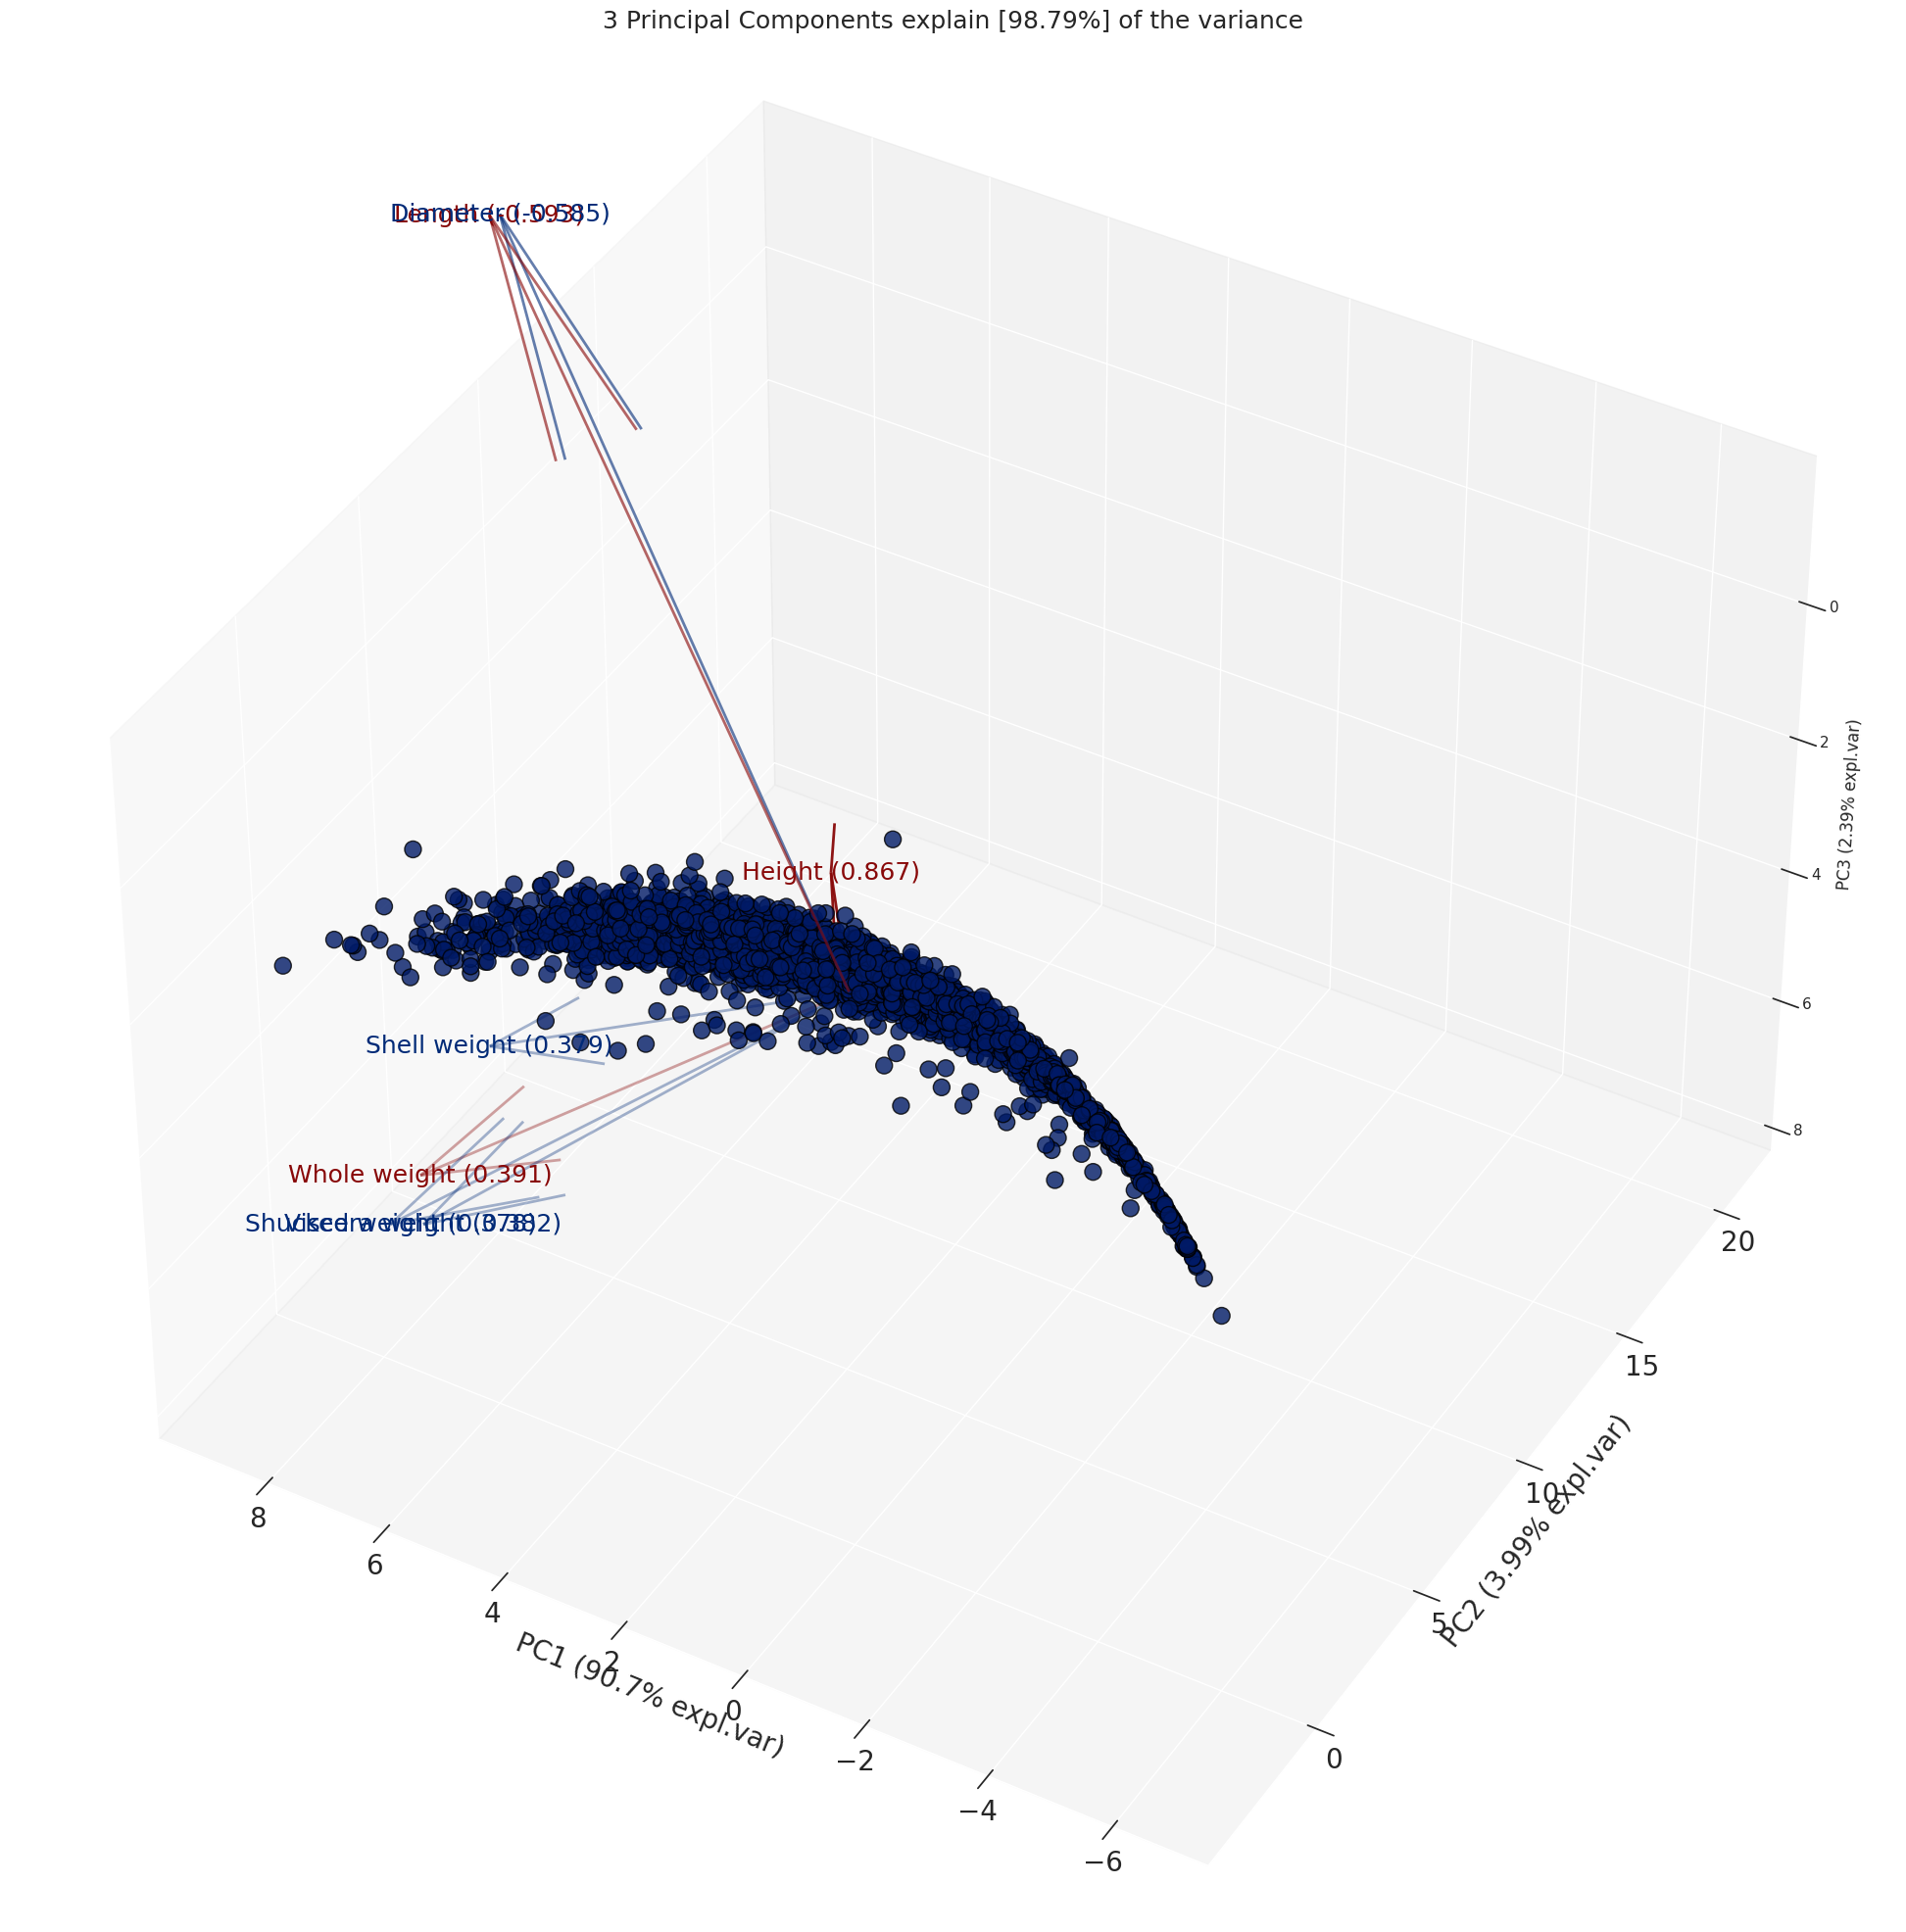

In [ ]:
ax = model.biplot3d(legend=False)

### **Principal components**

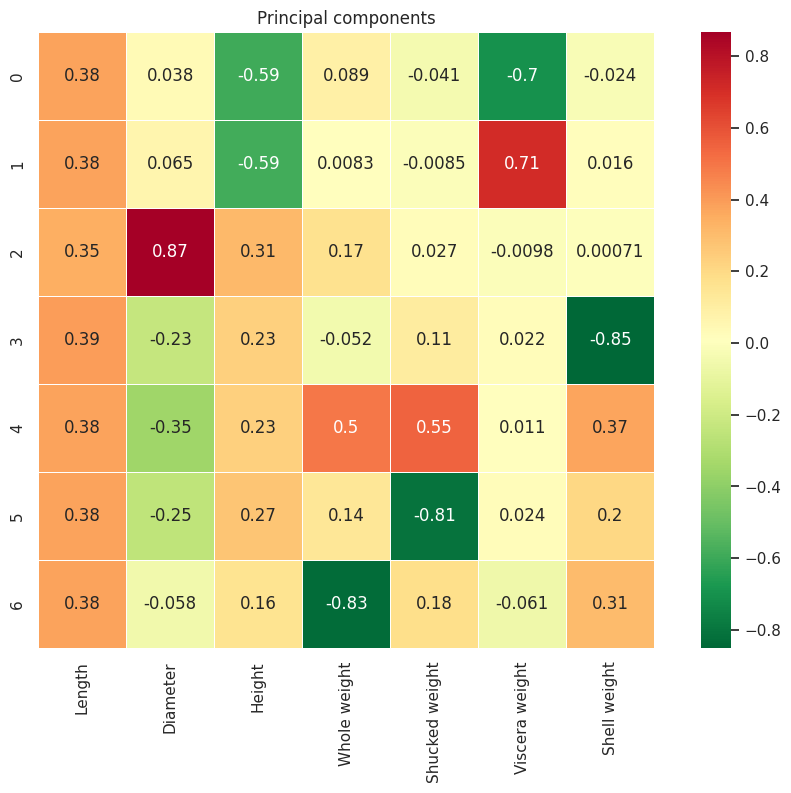

PC1:[0.38325082 0.38357319 0.34814383 0.39067346 0.37818829 0.38151341
 0.37892173]
PC2:[ 0.03786529  0.06532324  0.86683603 -0.23327117 -0.34801069 -0.25290295
 -0.05837478]


In [ ]:
comps = pd.DataFrame(A, columns = variables)
sns.heatmap(comps,cmap='RdYlGn_r', linewidths=0.5, annot=True,
            cbar=True, square=True)
ax.tick_params(labelbottom=False,labeltop=True)
plt.xticks(rotation=90)
plt.title('Principal components')
plt.show()

print(f'PC1:{A1}')
print(f'PC2:{A2}')

### **Hotelling's T2 test**

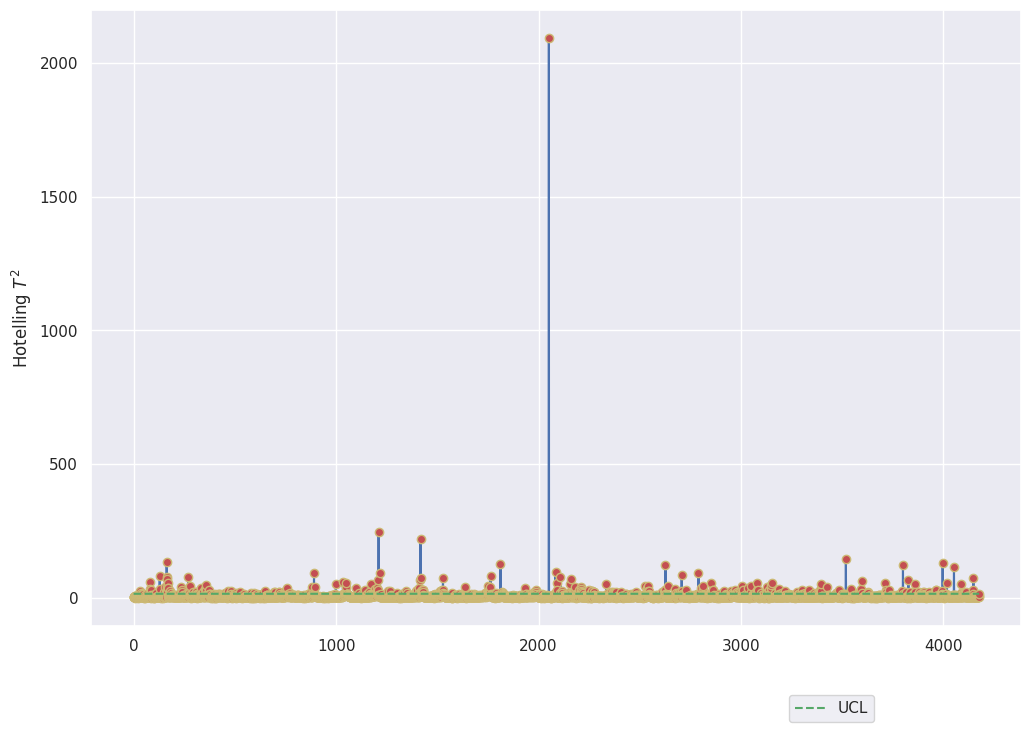

In [ ]:
alpha = 0.05
p=Z.shape[1]
n=Z.shape[0]

UCL=((n-1)**2/n )*beta.ppf(1-alpha, p / 2 , (n-p-1)/ 2)
UCL2=p*(n+1)*(n-1)/(n*(n-p) )*f.ppf(1-alpha, p , n-p)
Tsquare=np.array([0]*Z.shape[0])
for i in range(Z.shape[0]):
  Tsquare[i] = np.matmul(np.matmul(np.transpose(Z[i]),np.diag(1/Lambda) ) , Z[i])

fig, ax = plt.subplots()
ax.plot(Tsquare,'-b', marker='o', mec='y',mfc='r' )
ax.plot([UCL for i in range(len(Z1))], "--g", label="UCL")
plt.ylabel('Hotelling $T^2$')
legend = ax.legend(shadow=False, ncol=4, bbox_to_anchor=(0.85, -0.1))

In [ ]:
print(np.argwhere(Tsquare>UCL))

[[  31]
 [  36]
 [  46]
 [  67]
 [  81]
 [  83]
 [  85]
 [ 109]
 [ 128]
 [ 129]
 [ 148]
 [ 149]
 [ 157]
 [ 159]
 [ 163]
 [ 164]
 [ 165]
 [ 166]
 [ 167]
 [ 168]
 [ 169]
 [ 170]
 [ 181]
 [ 186]
 [ 236]
 [ 237]
 [ 238]
 [ 239]
 [ 270]
 [ 274]
 [ 275]
 [ 277]
 [ 291]
 [ 306]
 [ 307]
 [ 312]
 [ 321]
 [ 334]
 [ 344]
 [ 355]
 [ 357]
 [ 358]
 [ 369]
 [ 371]
 [ 372]
 [ 375]
 [ 446]
 [ 450]
 [ 465]
 [ 468]
 [ 480]
 [ 502]
 [ 506]
 [ 525]
 [ 526]
 [ 579]
 [ 593]
 [ 647]
 [ 687]
 [ 694]
 [ 696]
 [ 718]
 [ 719]
 [ 720]
 [ 746]
 [ 749]
 [ 753]
 [ 757]
 [ 759]
 [ 760]
 [ 762]
 [ 770]
 [ 863]
 [ 867]
 [ 873]
 [ 882]
 [ 885]
 [ 888]
 [ 891]
 [ 898]
 [ 999]
 [1034]
 [1045]
 [1048]
 [1049]
 [1051]
 [1053]
 [1098]
 [1112]
 [1145]
 [1162]
 [1168]
 [1174]
 [1193]
 [1197]
 [1198]
 [1199]
 [1201]
 [1202]
 [1204]
 [1206]
 [1207]
 [1209]
 [1210]
 [1216]
 [1257]
 [1264]
 [1302]
 [1337]
 [1344]
 [1351]
 [1391]
 [1394]
 [1400]
 [1411]
 [1412]
 [1416]
 [1417]
 [1418]
 [1419]
 [1422]
 [1426]
 [1427]
 [1428]
 [1429]


### **Control Charts for Principal Components**

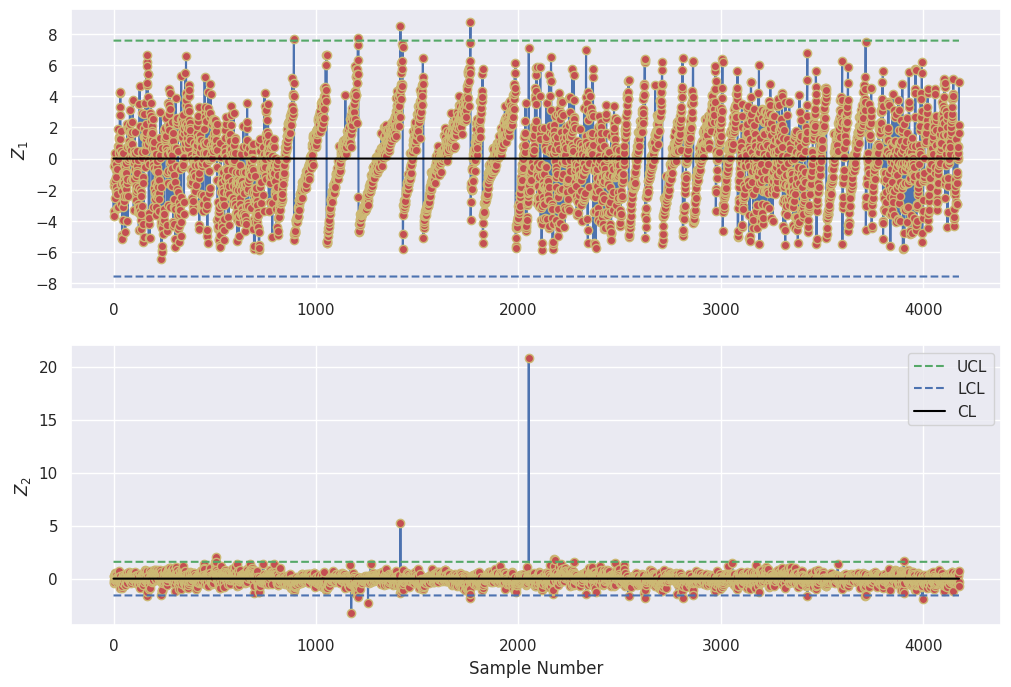

In [ ]:
fig, (ax1, ax2) = plt.subplots(2,1)
ax1.plot(Z1,'-b', marker='o', mec='y',mfc='r')
ax1.plot([3*np.sqrt(Lambda[0]) for i in range(len(Z1))], "--g", label="UCL")
ax1.plot([-3*np.sqrt(Lambda[0]) for i in range(len(Z1))], "--b", label='LCL')
ax1.plot([0 for i in range(len(Z1))], "-", color='black',label='CL')
ax1.set_ylabel('$Z_1$')
legend = ax.legend(shadow=False, ncol=4, bbox_to_anchor=(0.85, -0.1))

ax2.plot(Z2,'-b', marker='o', mec='y',mfc='r')
ax2.plot([3*np.sqrt(Lambda[1]) for i in range(len(Z2))], "--g", label="UCL")
ax2.plot([-3*np.sqrt(Lambda[1]) for i in range(len(Z2))], "--b", label='LCL')
ax2.plot([0 for i in range(len(Z2))], "-", color='black',label='CL')
ax2.set_ylabel('$Z_2$')
ax2.set_xlabel('Sample Number')
legend = ax.legend(shadow=False, ncol=4, bbox_to_anchor=(0.85, -0.1))
plt.legend()

#### Out of Control Points

In [ ]:
print(np.argwhere(Z1<-3*np.sqrt(Lambda[0])))
print(np.argwhere(Z1>3*np.sqrt(Lambda[0])))
print(np.argwhere(Z2<-3*np.sqrt(Lambda[1])))
print(np.argwhere(Z2>3*np.sqrt(Lambda[1])))

[]
[[ 891]
 [1209]
 [1417]
 [1763]]
[[ 165]
 [ 236]
 [1174]
 [1209]
 [1257]
 [1762]
 [2544]
 [2624]
 [2811]
 [2863]
 [3427]
 [3713]
 [3996]]
[[ 506]
 [1417]
 [2051]
 [2177]
 [2179]
 [3903]]


## **Multi-Class Classification**

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
# use seaborn plotting style defaults
import seaborn as sns
sns.set_theme(style="darkgrid")
plt.rcParams['figure.figsize'] = (12,8)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

from scipy.stats import beta
from scipy.stats import f

from itertools import cycle

# Machine Learning Modules
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

df = pd.read_csv('/content/abalone age.csv')
df.head(n=25)


y = df['Sex']
target = df['Sex'].to_numpy()
X = df.iloc[:,0:7]

# Test-Train Split


X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state=0)
print(f'Train Dataset Size: {X_train.shape[0]}')
print(f'Test Dataset Size: {X_test.shape[0]}')

Z_train, Z_test, zy_train, zy_test = train_test_split(Z, y, test_size=0.3, random_state=0)
Z12_train, Z12_test, z12y_train, z12y_test = train_test_split(Z[:,:2], y, test_size=0.3, random_state=0)

# Define the evaluation metric
scoring = ['f1_macro']

Train Dataset Size: 2923
Test Dataset Size: 1254




```
# This is formatted as code
```

### Gaussian Naive Bayes (GNB)

DATASET: FULL DATA
Classification Report:
              precision    recall  f1-score   support

           0      1.000     1.000     1.000       386
           1      1.000     1.000     1.000       868

    accuracy                          1.000      1254
   macro avg      1.000     1.000     1.000      1254
weighted avg      1.000     1.000     1.000      1254



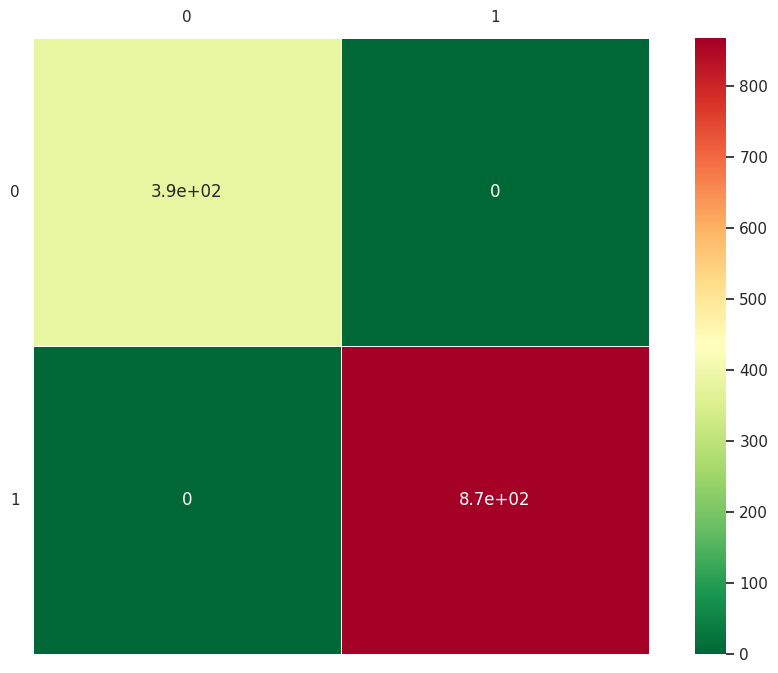

DATASET: Z
Classification Report:
              precision    recall  f1-score   support

           0      0.477     0.241     0.320       386
           1      0.723     0.882     0.795       868

    accuracy                          0.685      1254
   macro avg      0.600     0.562     0.558      1254
weighted avg      0.647     0.685     0.649      1254



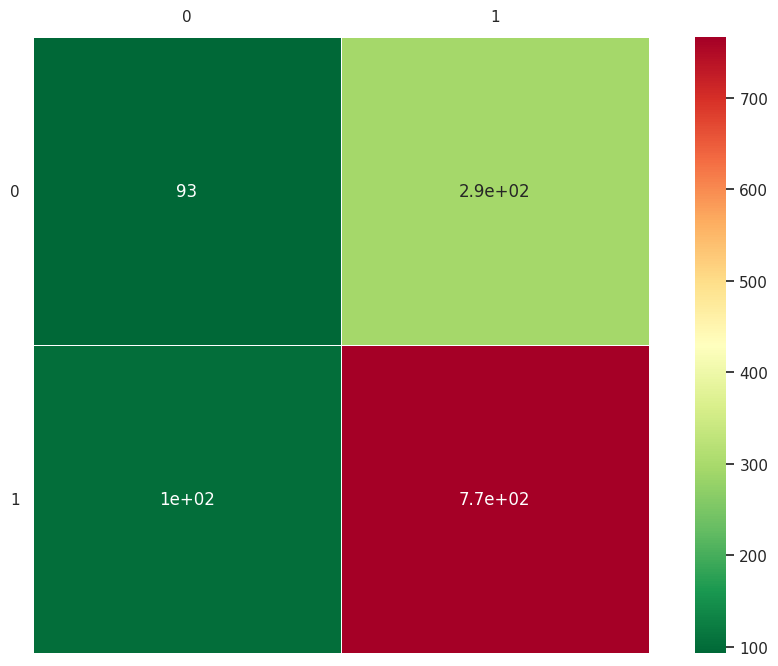

DATASET: Z12
Classification Report:
              precision    recall  f1-score   support

           0      0.433     0.101     0.164       386
           1      0.702     0.941     0.804       868

    accuracy                          0.683      1254
   macro avg      0.568     0.521     0.484      1254
weighted avg      0.619     0.683     0.607      1254



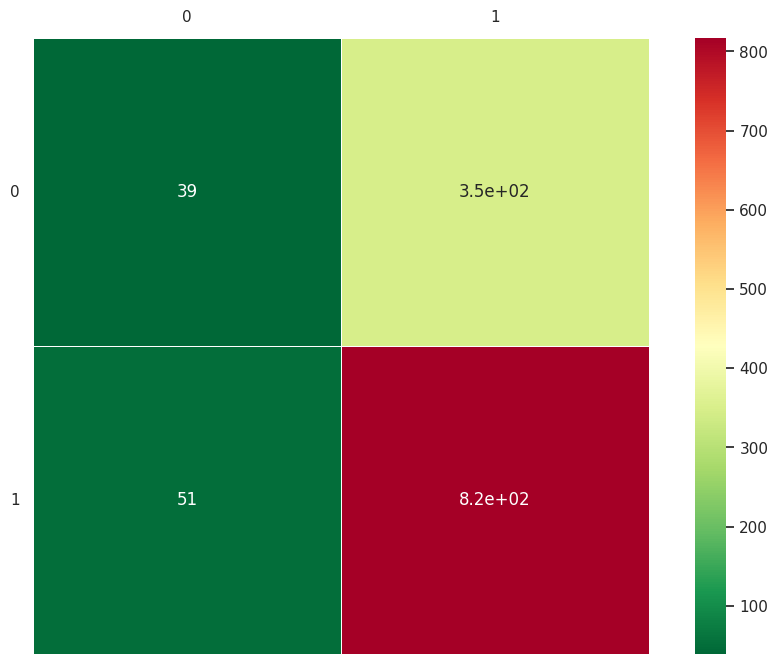

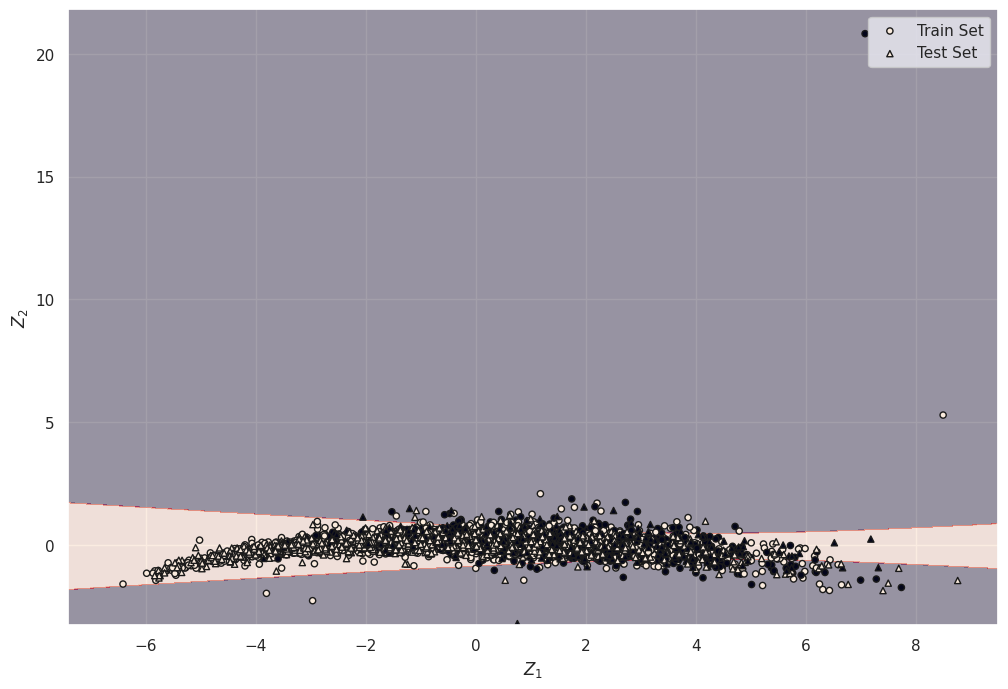

(array([   5,   12,   15,   17,   18,   23,   32,   33,   39,   40,   41,
         44,   47,   48,   50,   52,   53,   69,   71,   72,   73,   74,
         77,   80,   91,   94,   98,  100,  101,  102,  105,  110,  111,
        112,  113,  115,  117,  125,  126,  127,  129,  130,  131,  134,
        140,  144,  153,  163,  172,  181,  190,  191,  195,  199,  200,
        204,  205,  207,  209,  212,  223,  224,  228,  240,  241,  242,
        243,  246,  253,  255,  259,  260,  264,  266,  270,  275,  276,
        278,  279,  281,  284,  287,  289,  299,  300,  302,  304,  307,
        308,  309,  310,  314,  320,  323,  324,  325,  342,  343,  344,
        356,  357,  359,  364,  365,  370,  372,  374,  376,  378,  383,
        386,  391,  394,  401,  403,  404,  405,  407,  408,  409,  418,
        420,  422,  427,  428,  432,  435,  436,  437,  439,  442,  449,
        458,  459,  463,  465,  467,  473,  480,  481,  484,  486,  487,
        489,  491,  500,  506,  510,  511,  516,  

In [ ]:
gnb = GaussianNB()

datasets = [('FULL DATA', X_train, y_train, X_test, y_test), ('Z', Z_train, zy_train, Z_test, zy_test), ('Z12', Z12_train, z12y_train, Z12_test, z12y_test)]
for i, (name, Xtr, ytr, Xtst, ytst) in enumerate(datasets):
  gnb.fit(Xtr, ytr)
  y_pred = gnb.predict(Xtst)
  gnb_score = gnb.score(Xtst, ytst)

  # Classification Report
  print(f'DATASET: {name}')
  print('Classification Report:')
  print(classification_report(ytst, y_pred, digits=3))

  # Confusion Matrix
  cm_gnb = confusion_matrix(y_true=ytst, y_pred=y_pred)
  ax = sns.heatmap(cm_gnb, cmap='RdYlGn_r', linewidths=0.5, annot=True, square=True)
  plt.yticks(rotation=0)
  ax.tick_params(labelbottom=False,labeltop=True)
  ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
  #plt.title('Naive Bayes Confusion Matrix')
  plt.show()

  #ADAPTED FROM: https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html#sphx-glr-auto-examples-ensemble-plot-voting-decision-regions-py
  if name == 'Z12':
    # Plotting decision regions
    x_min, x_max = Xtr[:, 0].min() - 1, Xtr[:, 0].max() + 1
    y_min, y_max = Xtr[:, 1].min() - 1, Xtr[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    Z = gnb.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(Xtr[:, 0], Xtr[:, 1], c=ytr, s=20, edgecolor="k", label='Train Set')
    plt.scatter(Xtst[:, 0], Xtst[:, 1], c=ytst, marker='^', s=20, edgecolor="k", label='Test Set')
    plt.xlabel('$Z_1$')
    plt.ylabel('$Z_2$')
    plt.legend()
    plt.show()

    print(np.where(ytst != y_pred))

### K Nearest Neighbors (KNN)

1.   List item
2.   List item



Grid Search Results:
depth_full_data: {'max_depth': 2}
depth_Z: {'max_depth': 2}
depth_Z12: {'max_depth': 2}
                                   0         1         2         3         4
dt_full_data fit_time       0.003068  0.002850  0.002758  0.002777  0.002747
dt_Z  fit_time              0.004207  0.004221  0.004175  0.004268  0.004232
dt_Z12 fit_time             0.001817  0.001714  0.001735  0.001723  0.001710
dt_full_data test_f1_macro  1.000000  1.000000  1.000000  1.000000  1.000000
dt_Z  test_f1_macro         0.406694  0.406694  0.406091  0.406504  0.406504
dt_Z12 test_f1_macro        0.406694  0.406694  0.406091  0.406504  0.406504

DATASET: FULL DATA
Classification Report:
              precision    recall  f1-score   support

           0      1.000     1.000     1.000       386
           1      1.000     1.000     1.000       868

    accuracy                          1.000      1254
   macro avg      1.000     1.000     1.000      1254
weighted avg      1.000     1.000    

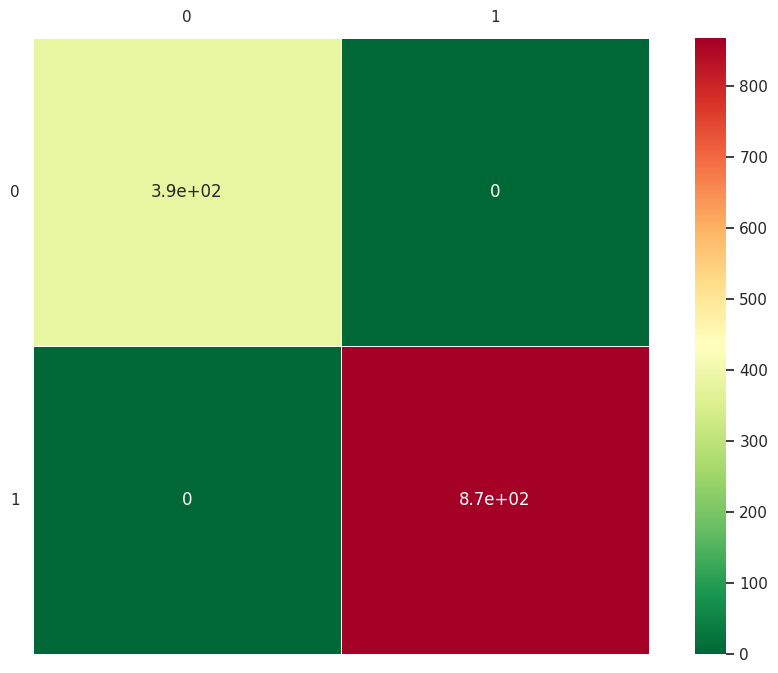

DATASET: Z
Classification Report:
              precision    recall  f1-score   support

           0      0.000     0.000     0.000       386
           1      0.692     1.000     0.818       868

    accuracy                          0.692      1254
   macro avg      0.346     0.500     0.409      1254
weighted avg      0.479     0.692     0.566      1254



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


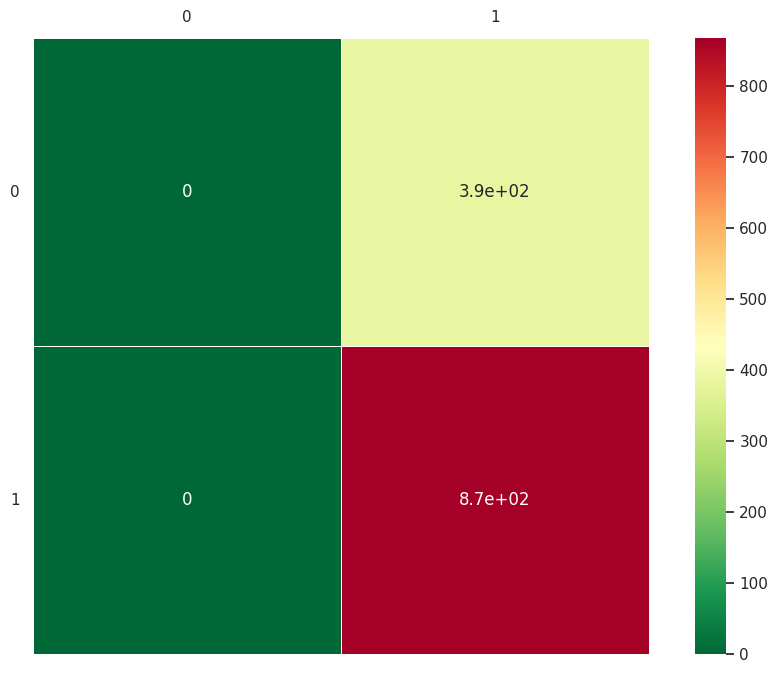

DATASET: Z12
Classification Report:
              precision    recall  f1-score   support

           0      0.000     0.000     0.000       386
           1      0.692     1.000     0.818       868

    accuracy                          0.692      1254
   macro avg      0.346     0.500     0.409      1254
weighted avg      0.479     0.692     0.566      1254



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


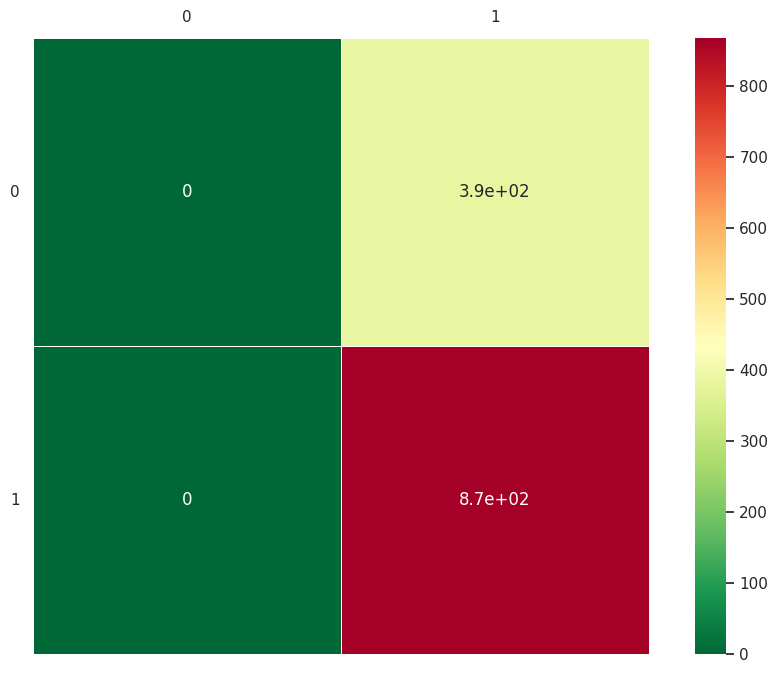

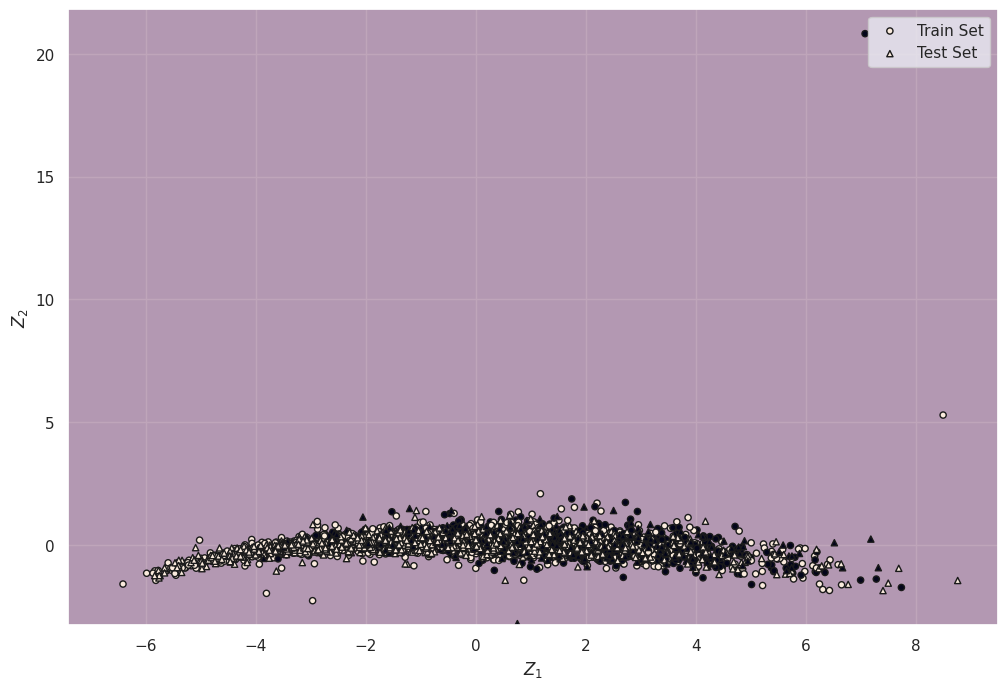

In [ ]:
# Hyperparameter search for DT depth
param_grid = {'max_depth': [2, 4, 8, 16, 32, 64]}
dt = DecisionTreeClassifier(random_state=0)
grid_search = GridSearchCV(dt, param_grid, cv=5)

# Find best depth
dt_full_data = grid_search.fit(X_train, y_train)
dt_Z = grid_search.fit(Z_train, zy_train)
dt_Z12 = grid_search.fit(Z12_train, z12y_train)

# Get best tree depth
print('Grid Search Results:')
depth_full_data = dt_full_data.best_params_
depth_Z = dt_Z.best_params_
depth_Z12 = dt_Z12.best_params_
print(f'depth_full_data: {depth_full_data}\ndepth_Z: {depth_Z}\ndepth_Z12: {depth_Z12}')

# Apply best k
dt = DecisionTreeClassifier(max_depth=depth_full_data.get('max_depth'))
scores_dt_full_data = cross_validate(dt, X_train, y_train, cv=5, scoring=scoring)
scores_dt_Z = cross_validate(dt, Z_train, zy_train, cv=5, scoring=scoring)
scores_dt_Z12 = cross_validate(dt, Z12_train, z12y_train, cv=5, scoring=scoring)

dt_scores_dict={}
for i in ['fit_time', 'test_f1_macro']:
  dt_scores_dict["dt_full_data " + i ] = scores_dt_full_data[i]
  dt_scores_dict["dt_Z  " + i ] = scores_dt_Z[i]
  dt_scores_dict["dt_Z12 " + i ] = scores_dt_Z12[i]

dt_scores_data = pd.DataFrame(dt_scores_dict).T
#dt_scores_data['avgs'] = dt_scores_data.mean(axis=1)
print(f'{dt_scores_data}\n')

datasets = [('FULL DATA', X_train, y_train, X_test, y_test), ('Z', Z_train, zy_train, Z_test, zy_test), ('Z12', Z12_train, z12y_train, Z12_test, z12y_test)]
for i, (name, Xtr, ytr, Xtst, ytst) in enumerate(datasets):
  # Apply on train-test split
  dt.fit(Xtr, ytr)
  y_pred = dt.predict(Xtst)
  dt_score = dt.score(Xtst, ytst)
  #print(dt_score)

  # Classification Report
  print(f'DATASET: {name}')
  print('Classification Report:')
  print(classification_report(ytst, y_pred, digits=3))

  # Confusion Matrix
  cm_dt = confusion_matrix(y_true=ytst, y_pred=y_pred)
  ax = sns.heatmap(cm_dt, cmap='RdYlGn_r', linewidths=0.5, annot=True, square=True)
  plt.yticks(rotation=0)
  ax.tick_params(labelbottom=False,labeltop=True)
  ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
  #plt.title('Decision Tree Confusion Matrix')
  plt.show()

  #ADAPTED FROM: https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html#sphx-glr-auto-examples-ensemble-plot-voting-decision-regions-py
  if name == 'Z12':
    # Plotting decision regions
    x_min, x_max = Xtr[:, 0].min() - 1, Xtr[:, 0].max() + 1
    y_min, y_max = Xtr[:, 1].min() - 1, Xtr[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    Z = dt.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(Xtr[:, 0], Xtr[:, 1], c=ytr, s=20, edgecolor="k", label='Train Set')
    plt.scatter(Xtst[:, 0], Xtst[:, 1], c=ytst, marker='^', s=20, edgecolor="k", label='Test Set')
    plt.xlabel('$Z_1$')
    plt.ylabel('$Z_2$')
    plt.legend()
    plt.show()

### Decision Trees (DT)

Grid Search Results:
depth_full_data: {'max_depth': 2}
depth_Z: {'max_depth': 2}
depth_Z12: {'max_depth': 2}
                                   0         1         2         3         4
dt_full_data fit_time       0.003713  0.002828  0.002815  0.002809  0.002885
dt_Z  fit_time              0.004230  0.004333  0.004215  0.004338  0.004294
dt_Z12 fit_time             0.001856  0.001802  0.001727  0.001766  0.001810
dt_full_data test_f1_macro  1.000000  1.000000  1.000000  1.000000  1.000000
dt_Z  test_f1_macro         0.406694  0.406694  0.406091  0.406504  0.406504
dt_Z12 test_f1_macro        0.406694  0.406694  0.406091  0.406504  0.406504

DATASET: FULL DATA
Classification Report:
              precision    recall  f1-score   support

           0      1.000     1.000     1.000       386
           1      1.000     1.000     1.000       868

    accuracy                          1.000      1254
   macro avg      1.000     1.000     1.000      1254
weighted avg      1.000     1.000    

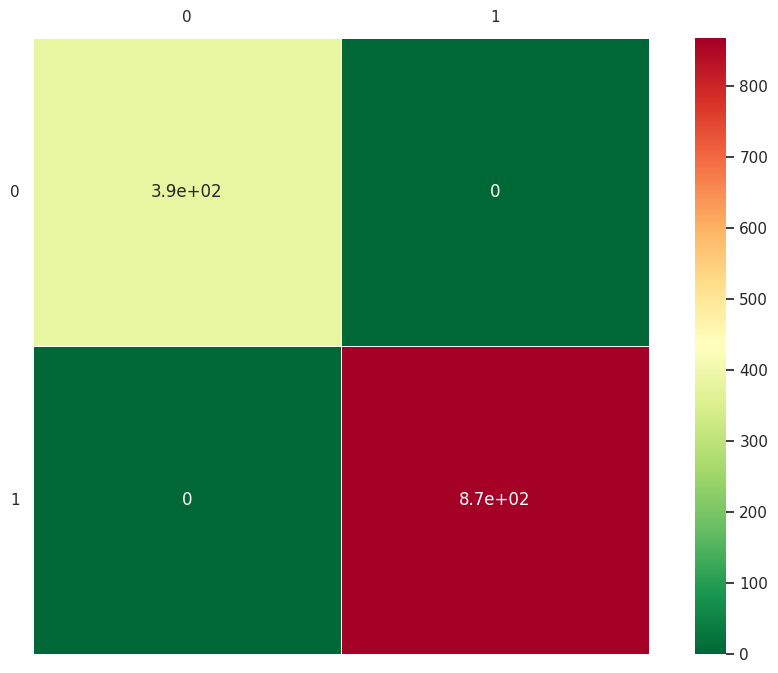

DATASET: Z
Classification Report:
              precision    recall  f1-score   support

           0      0.000     0.000     0.000       386
           1      0.692     1.000     0.818       868

    accuracy                          0.692      1254
   macro avg      0.346     0.500     0.409      1254
weighted avg      0.479     0.692     0.566      1254



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


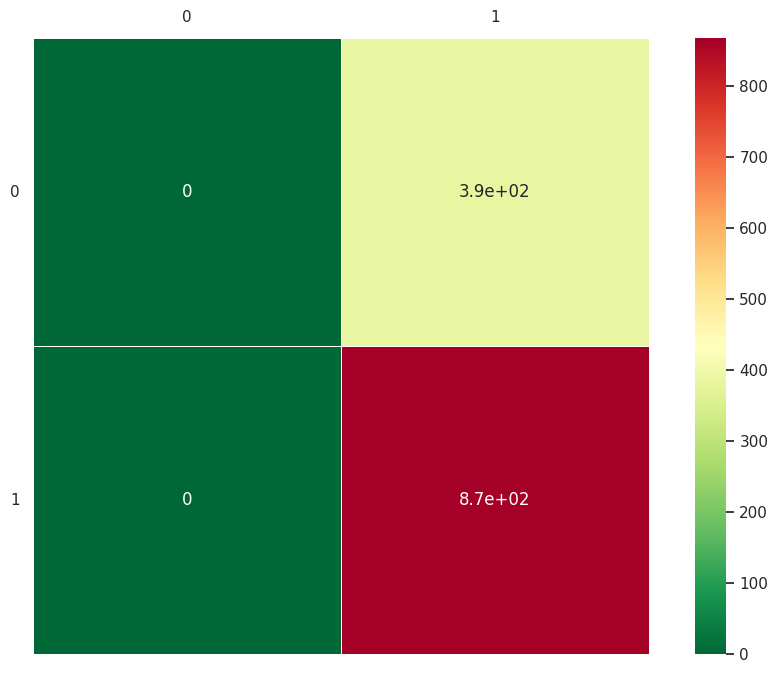

DATASET: Z12
Classification Report:
              precision    recall  f1-score   support

           0      0.000     0.000     0.000       386
           1      0.692     1.000     0.818       868

    accuracy                          0.692      1254
   macro avg      0.346     0.500     0.409      1254
weighted avg      0.479     0.692     0.566      1254



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


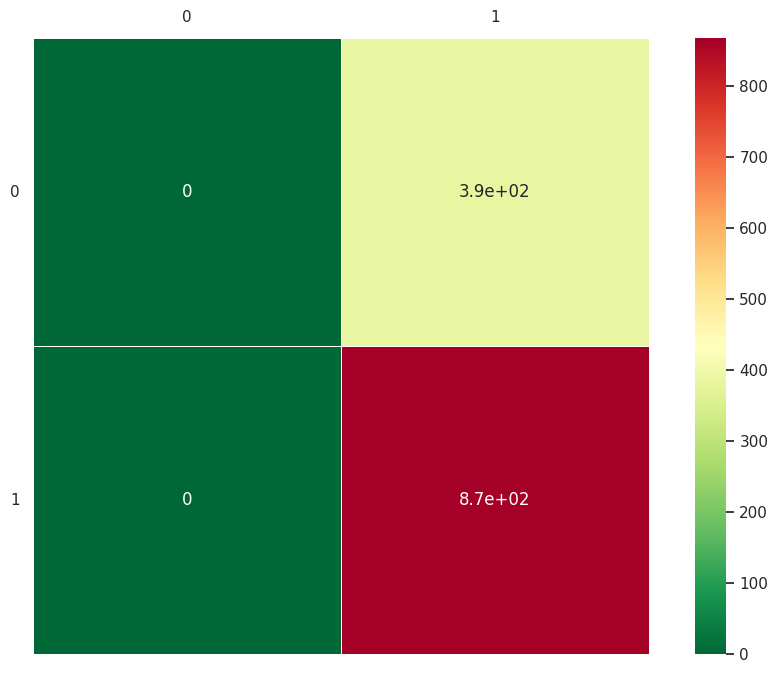

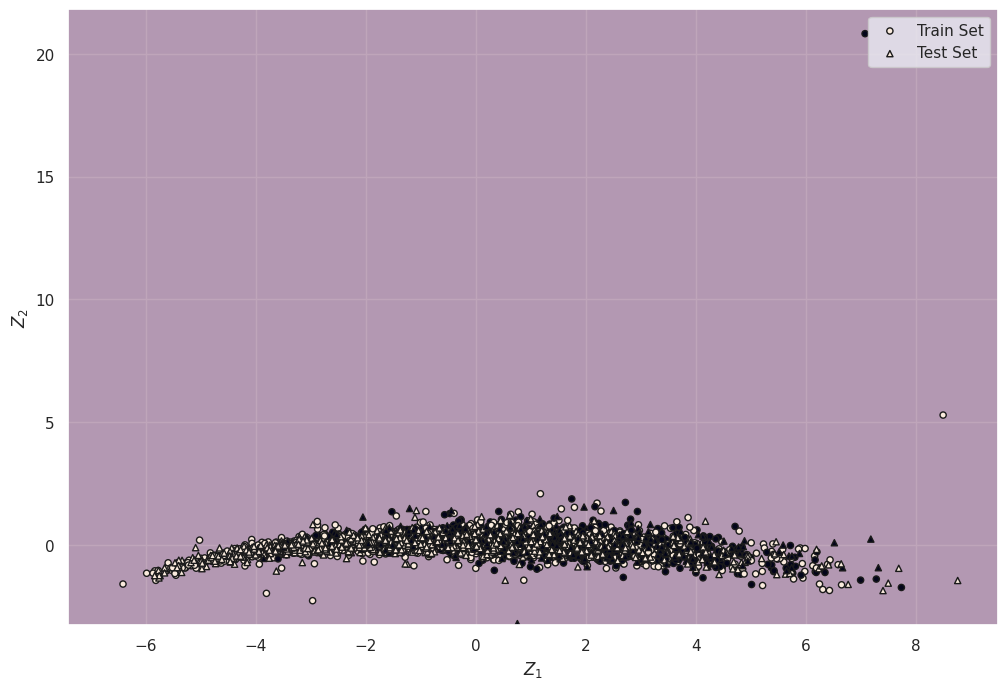

In [ ]:
# Hyperparameter search for DT depth
param_grid = {'max_depth': [2, 4, 8, 16, 32, 64]}
dt = DecisionTreeClassifier(random_state=0)
grid_search = GridSearchCV(dt, param_grid, cv=5)

# Find best depth
dt_full_data = grid_search.fit(X_train, y_train)
dt_Z = grid_search.fit(Z_train, zy_train)
dt_Z12 = grid_search.fit(Z12_train, z12y_train)

# Get best tree depth
print('Grid Search Results:')
depth_full_data = dt_full_data.best_params_
depth_Z = dt_Z.best_params_
depth_Z12 = dt_Z12.best_params_
print(f'depth_full_data: {depth_full_data}\ndepth_Z: {depth_Z}\ndepth_Z12: {depth_Z12}')

# Apply best k
dt = DecisionTreeClassifier(max_depth=depth_full_data.get('max_depth'))
scores_dt_full_data = cross_validate(dt, X_train, y_train, cv=5, scoring=scoring)
scores_dt_Z = cross_validate(dt, Z_train, zy_train, cv=5, scoring=scoring)
scores_dt_Z12 = cross_validate(dt, Z12_train, z12y_train, cv=5, scoring=scoring)

dt_scores_dict={}
for i in ['fit_time', 'test_f1_macro']:
  dt_scores_dict["dt_full_data " + i ] = scores_dt_full_data[i]
  dt_scores_dict["dt_Z  " + i ] = scores_dt_Z[i]
  dt_scores_dict["dt_Z12 " + i ] = scores_dt_Z12[i]

dt_scores_data = pd.DataFrame(dt_scores_dict).T
#dt_scores_data['avgs'] = dt_scores_data.mean(axis=1)
print(f'{dt_scores_data}\n')

datasets = [('FULL DATA', X_train, y_train, X_test, y_test), ('Z', Z_train, zy_train, Z_test, zy_test), ('Z12', Z12_train, z12y_train, Z12_test, z12y_test)]
for i, (name, Xtr, ytr, Xtst, ytst) in enumerate(datasets):
  # Apply on train-test split
  dt.fit(Xtr, ytr)
  y_pred = dt.predict(Xtst)
  dt_score = dt.score(Xtst, ytst)
  #print(dt_score)

  # Classification Report
  print(f'DATASET: {name}')
  print('Classification Report:')
  print(classification_report(ytst, y_pred, digits=3))

  # Confusion Matrix
  cm_dt = confusion_matrix(y_true=ytst, y_pred=y_pred)
  ax = sns.heatmap(cm_dt, cmap='RdYlGn_r', linewidths=0.5, annot=True, square=True)
  plt.yticks(rotation=0)
  ax.tick_params(labelbottom=False,labeltop=True)
  ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
  #plt.title('Decision Tree Confusion Matrix')
  plt.show()

  #ADAPTED FROM: https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html#sphx-glr-auto-examples-ensemble-plot-voting-decision-regions-py
  if name == 'Z12':
    # Plotting decision regions
    x_min, x_max = Xtr[:, 0].min() - 1, Xtr[:, 0].max() + 1
    y_min, y_max = Xtr[:, 1].min() - 1, Xtr[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    Z = dt.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(Xtr[:, 0], Xtr[:, 1], c=ytr, s=20, edgecolor="k", label='Train Set')
    plt.scatter(Xtst[:, 0], Xtst[:, 1], c=ytst, marker='^', s=20, edgecolor="k", label='Test Set')
    plt.xlabel('$Z_1$')
    plt.ylabel('$Z_2$')
    plt.legend()
    plt.show()

## **ROC Curves**

DATASET: FULL DATA
      Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
668    0.550     0.425   0.155        0.9175          0.2775          0.2430   
1580   0.500     0.400   0.120        0.6160          0.2610          0.1430   
3784   0.620     0.480   0.155        1.2555          0.5270          0.3740   
463    0.220     0.165   0.055        0.0545          0.0215          0.0120   
2615   0.645     0.500   0.175        1.5105          0.6735          0.3755   
...      ...       ...     ...           ...             ...             ...   
1052   0.765     0.600   0.220        2.3020          1.0070          0.5090   
3439   0.440     0.350   0.125        0.4560          0.2100          0.0955   
1174   0.635     0.495   0.015        1.1565          0.5115          0.3080   
2210   0.660     0.505   0.200        1.6305          0.4865          0.2970   
2408   0.620     0.485   0.170        1.2080          0.4805          0.3045   

      Shell weight  

/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 2 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


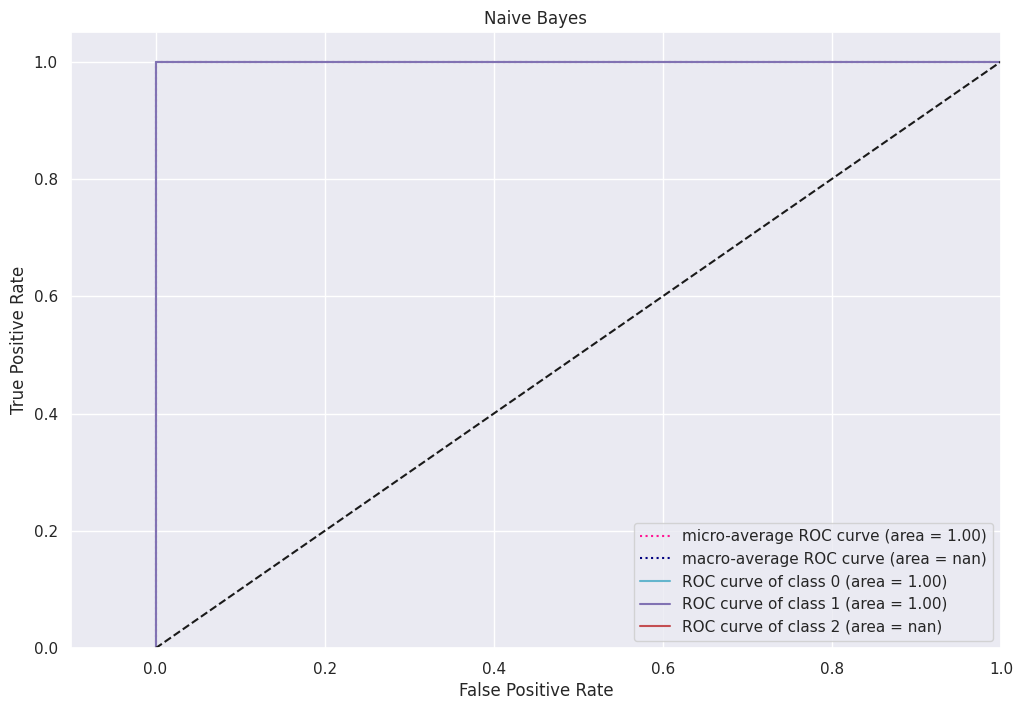

      Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
668    0.550     0.425   0.155        0.9175          0.2775          0.2430   
1580   0.500     0.400   0.120        0.6160          0.2610          0.1430   
3784   0.620     0.480   0.155        1.2555          0.5270          0.3740   
463    0.220     0.165   0.055        0.0545          0.0215          0.0120   
2615   0.645     0.500   0.175        1.5105          0.6735          0.3755   
...      ...       ...     ...           ...             ...             ...   
1052   0.765     0.600   0.220        2.3020          1.0070          0.5090   
3439   0.440     0.350   0.125        0.4560          0.2100          0.0955   
1174   0.635     0.495   0.015        1.1565          0.5115          0.3080   
2210   0.660     0.505   0.200        1.6305          0.4865          0.2970   
2408   0.620     0.485   0.170        1.2080          0.4805          0.3045   

      Shell weight  Rings  Sex  
668   

InvalidParameterError: ignored

In [ ]:
from itertools import cycle

#ADAPTED FROM: https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py

datasets = [('FULL DATA', X_train, y_train, X_test, y_test), ('Z', Z_train, zy_train, Z_test, zy_test), ('Z12', Z12_train, z12y_train, Z12_test, z12y_test)]
for i, (name, X_tr, y_tr, X_tst, y_tst) in enumerate(datasets):
  # Binarize the labels
  y_train = label_binarize(y_tr, classes=[0, 1, 2])
  y_test = label_binarize(y_tst, classes=[0, 1, 2])
  n_classes = y_train.shape[1]
  print(f'DATASET: {name}')

  list_algos = [gnb, KNN, dt]
  algo_name = ['Naive Bayes', 'K-Nearest Neighbors', 'Decision Tree']
  for i, (algo, algo_name) in enumerate(zip(list_algos, algo_name)):
    classifier = OneVsRestClassifier(algo)
    print(X_tst)
    y_pred = classifier.fit(X_tr, y_train).predict(X_tst)
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:,i], y_pred[:,i], drop_intermediate=False)
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel(), drop_intermediate=False)
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    fig, ax = plt.subplots()

    plt.plot(fpr["micro"], tpr["micro"], label=f'micro-average ROC curve (area = {roc_auc["micro"]:0.2f})', color="deeppink", linestyle=':')
    plt.plot(fpr["macro"], tpr["macro"], label=f'macro-average ROC curve (area = {roc_auc["macro"]:0.2f})', color="navy", linestyle=':')

    colors = cycle(['c', 'm', 'r'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i],tpr[i], color=color,label=f'ROC curve of class {i} (area = {roc_auc[i]:0.2f})')

    plt.plot([0, 1], [0, 1], "k--")
    plt.xlim([-0.1, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f'{algo_name}')
    plt.legend()
    plt.show()

## **Bar Chart Plot**

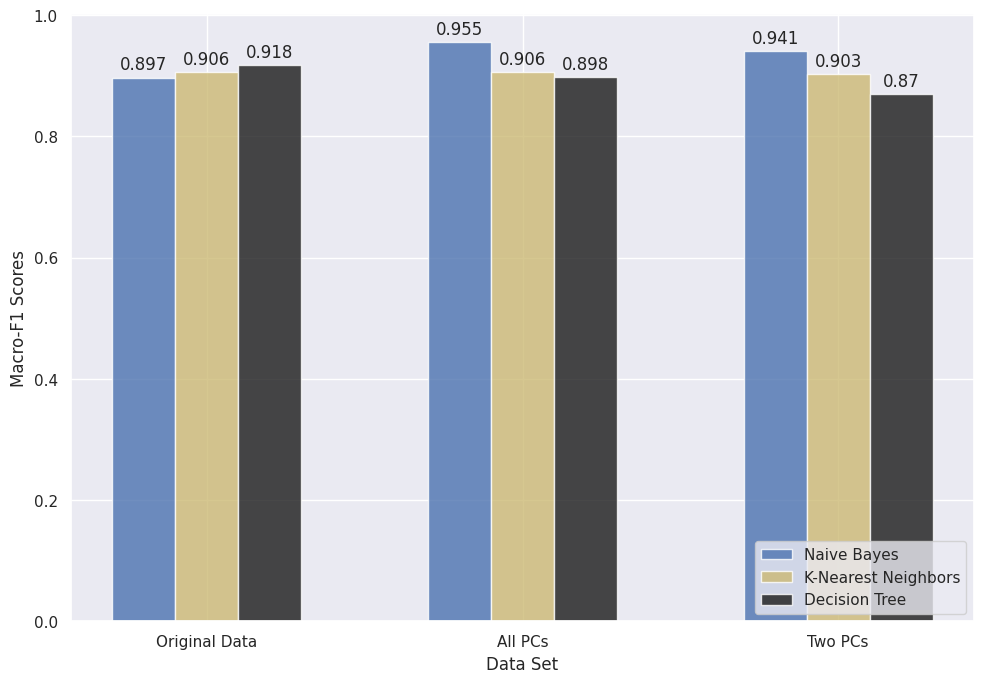

In [ ]:
# ADAPTED FROM: https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/barchart.html
def autolabel(rects):
    for r in rects:
        height = r.get_height()
        ax.annotate(f'{height}', xy=(r.get_x() + r.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

n_groups = 3
ind = np.arange(n_groups)

# F1 Scores from above
NB = (0.897, 0.955, 0.941)
KNN = (0.906, 0.906, 0.903)
DT = (0.918, 0.898, 0.870)

# create plot
fig, ax = plt.subplots(figsize=(10,7))
index = np.arange(n_groups)
bar_width = 0.20
opacity = 0.8

rects1 = plt.bar(index, NB, bar_width, alpha=opacity, color='b', label='Naive Bayes')
rects2 = plt.bar(index + bar_width, KNN, bar_width, alpha=opacity, color='y', label='K-Nearest Neighbors')
rects3 = plt.bar(index + bar_width*2, DT, bar_width, alpha=opacity, color='k', label='Decision Tree')

ax.set_xlabel('Data Set')
ax.set_ylabel('Macro-F1 Scores')
#plt.title(f'')
plt.xticks(index + bar_width, ('Original Data', 'All PCs', 'Two PCs'))
plt.legend(loc="lower right")

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.tight_layout()
plt.show()